# Introduction

In simplified terms, the four factors are statistical metrics that evaluate the efficiency and effectiveness of both teams and players during NBA games. These metrics, pioneered by Dean Oliver, serve as crucial benchmarks for assessing how teams secure victories. Think of them as key performance indicators for a basketball team.

The four factors are:

Shooting: This factor assesses a team's precision in making field goals, related to their accuracy in hitting the target.

Turnovers: Turnovers track how frequently a team loses possession of the ball to the opponent. Fewer turnovers are preferable, as they equate to minimizing errors.

Rebounding: Rebounding measures a team's ability to secure missed shots, encompassing both offensive and defensive rebounds. It resembles the team's capacity to secure second chances in a game.

Free Throws: This factor reflects a team's precision when taking uncontested shots from the free-throw line, resembling their ability to capitalize on easy scoring opportunities.

These four factors are quantified using the following performance measures:

Shooting: Effective field goal percentage
Turnovers: Turnover percentage
Rebounding: Offensive and defensive rebounding percentages
Free Throws: Free throw rate and free throw percentage
Each of these factors can be applied to both a team's offensive and defensive performance.

However, it's important to note that these factors are not given equal weight in the assessment of a team's efficiency and effectiveness. Out of a total of 100, shooting is assigned a 40% weight, turnovers 25%, rebounding 20%, and free throws 15%.

The core question underpinning this analysis is to determine how effectively these four factors measure or influence the success of basketball teams in winning games.

The hypothesis is that a team excelling in all four factors should exhibit a high winning percentage. This analysis aims to confirm whether this hypothesis holds true or if certain factors prove to be more influential than others, and whether the assigned weights accurately represent their impact.

To achieve this, I conducted an analysis on the 2022/2023 NBA season. The objective is to compare the significance of each factor against each team's winning percentage and employed statistical analysis to ascertain which of the four factors has the most significant impact on a team's success.






In [ ]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np

#Data Collection

Source: https://www.basketball-reference.com/

In [ ]:
file_path = 'file'

# Data Cleaning and Preparation

In [ ]:
merged_df = pd.DataFrame()

In [ ]:
xls = pd.ExcelFile(file_path)

In [ ]:
for sheet_name in xls.sheet_names:
  df = pd.read_excel(xls, sheet_name, header=1)
  df['Team'] = df['Team'].str.replace('*', '', regex=False)
  df['Season'] = sheet_name

  merged_df = pd.concat([merged_df, df], ignore_index=True)

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 32 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rk           300 non-null    float64
 1   Team         310 non-null    object 
 2   Age          310 non-null    float64
 3   W            300 non-null    float64
 4   L            300 non-null    float64
 5   PW           310 non-null    int64  
 6   PL           310 non-null    int64  
 7   MOV          310 non-null    float64
 8   SOS          310 non-null    float64
 9   SRS          310 non-null    float64
 10  ORtg         310 non-null    float64
 11  DRtg         310 non-null    float64
 12  NRtg         300 non-null    float64
 13  Pace         310 non-null    float64
 14  FTr          310 non-null    float64
 15  3PAr         310 non-null    float64
 16  TS%          310 non-null    float64
 17  Champion     310 non-null    object 
 18  eFG%         310 non-null    float64
 19  TOV%    

In [ ]:
merged_df['Season'] = merged_df['Season'].str.replace(r'(\d{4})-(\d{2}) Season', r'20\2', regex=True)
merged_df['Win%'] = merged_df['W'] / (merged_df['W'] + merged_df['L'])
merged_df = merged_df[merged_df['Team'] != 'League Average']

In [ ]:
table_1 = ['Team','Win%','eFG%', 'TOV%', 'ORB%', 'FT/FGA','eFG%.1', 'TOV%.1', 'DRB%','FT/FGA.1', 'Season',]

In [ ]:
df1 = merged_df.copy()[table_1]
df1 = df1.rename(columns={'eFG%.1': 'd_eFG%','TOV%.1':'d_TOV%','FT/FGA.1':'d_FT/FGA'})

In [ ]:
df1.head()

Team      Win%   eFG%  TOV%  ORB%  FT/FGA  d_eFG%  d_TOV%  \
0      San Antonio Spurs  0.756098  0.537  13.5  22.7   0.188   0.482    12.8   
1   Los Angeles Clippers  0.695122  0.526  12.7  25.0   0.258   0.484    13.8   
2  Oklahoma City Thunder  0.719512  0.520  14.0  26.5   0.244   0.488    13.9   
3             Miami Heat  0.658537  0.554  14.6  20.6   0.228   0.511    15.8   
4  Golden State Warriors  0.621951  0.517  13.8  25.1   0.186   0.477    13.6   

   DRB%  d_FT/FGA Season  
0  76.4     0.184   2014  
1  72.5     0.222   2014  
2  75.6     0.221   2014  
3  73.0     0.212   2014  
4  76.3     0.224   2014

# Visualize the Data

## Functions

In [ ]:
def plot_factor_vs_win(ax, df, year, col, win_col, color, label, title):
    """
    Plot factor against Win% for a given subset of data.

    Parameters:
    - ax: The axes object to plot on.
    - df: The dataframe to source data from.
    - year: The specific year to filter data on
    - subset: The subset of the dataframe to plot.
    - col: The column name for the factor to analyse.
    - win_col: The column name for Win%.
    - color: Color for the scatter plot.
    - label: name of the x axis
    - title: Title for the plot.
    """
    subset = df[df['Season'] == year]
    ax.scatter(subset[col], subset[win_col], marker='x', color=color)
    for team, factor, win in zip(subset['Team'], subset[col], subset[win_col]):
        ax.text(factor, win, team, fontsize=10, ha='right', va='bottom')
    ax.set_xlabel(label)
    ax.set_ylabel('Win Percentage')
    ax.set_title(title)
    ax.grid(True)

## Effective Field Goal Percentage vs Win Percentage

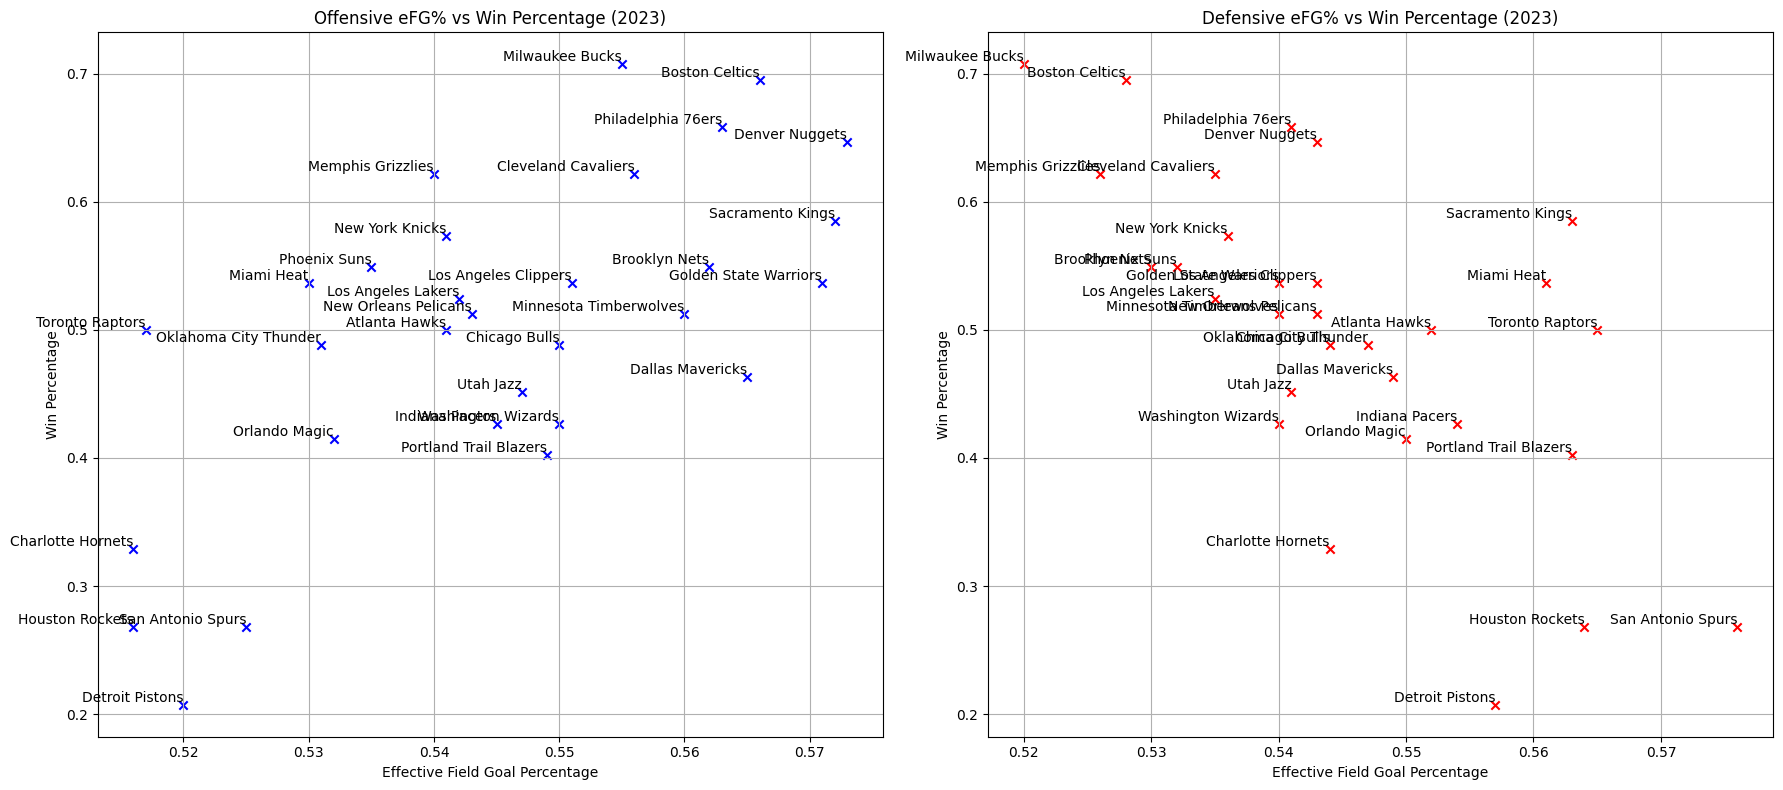

In [ ]:
selected_year = '2023'
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))

plot_factor_vs_win(axes[0], df1, selected_year, 'eFG%', 'Win%', 'blue', 'Effective Field Goal Percentage', f'Offensive eFG% vs Win Percentage ({selected_year})')
plot_factor_vs_win(axes[1], df1, selected_year, 'd_eFG%', 'Win%', 'red', 'Effective Field Goal Percentage', f'Defensive eFG% vs Win Percentage ({selected_year})')

plt.tight_layout()
plt.show()

A high offensive effective field goal percentage (eFG%) means that the team is converting its shooting attempts into points efficiently.

A low defensive eFG% means that the team's defense is effectively limiting the opposing team's shooting success. The lower this metric, the tougher it is for opponents to score against the team.

When a team has both a high offensive eFG% (they score efficiently) and a low defensive eFG% (they prevent opponents from scoring efficiently), it indicates that they are performing well on both ends of the court.

This combination is typically, a hallmark of successful teams.

From both the scatter plots in our analysis, we clearly see a strong correlation between teams with a high offensive eFG% and low defensive eFG% and their winning percentage.

We particularly see a stronger correlation with the defensive eFG% compared to offensive eFG% as the team with the highest winning percentage (Milwaukee Bucks) had the lowest defensive eFG%. This makes a lot of sense as preventing your opponent from scoring provides further opportunity for your team to transition and make more plays on offense. In addition, we can see the Bucks were not the most effective on offense (coming in 10th overall), but their defense played a major part in their success.

## Turnover Percentage vs Winning Percentage

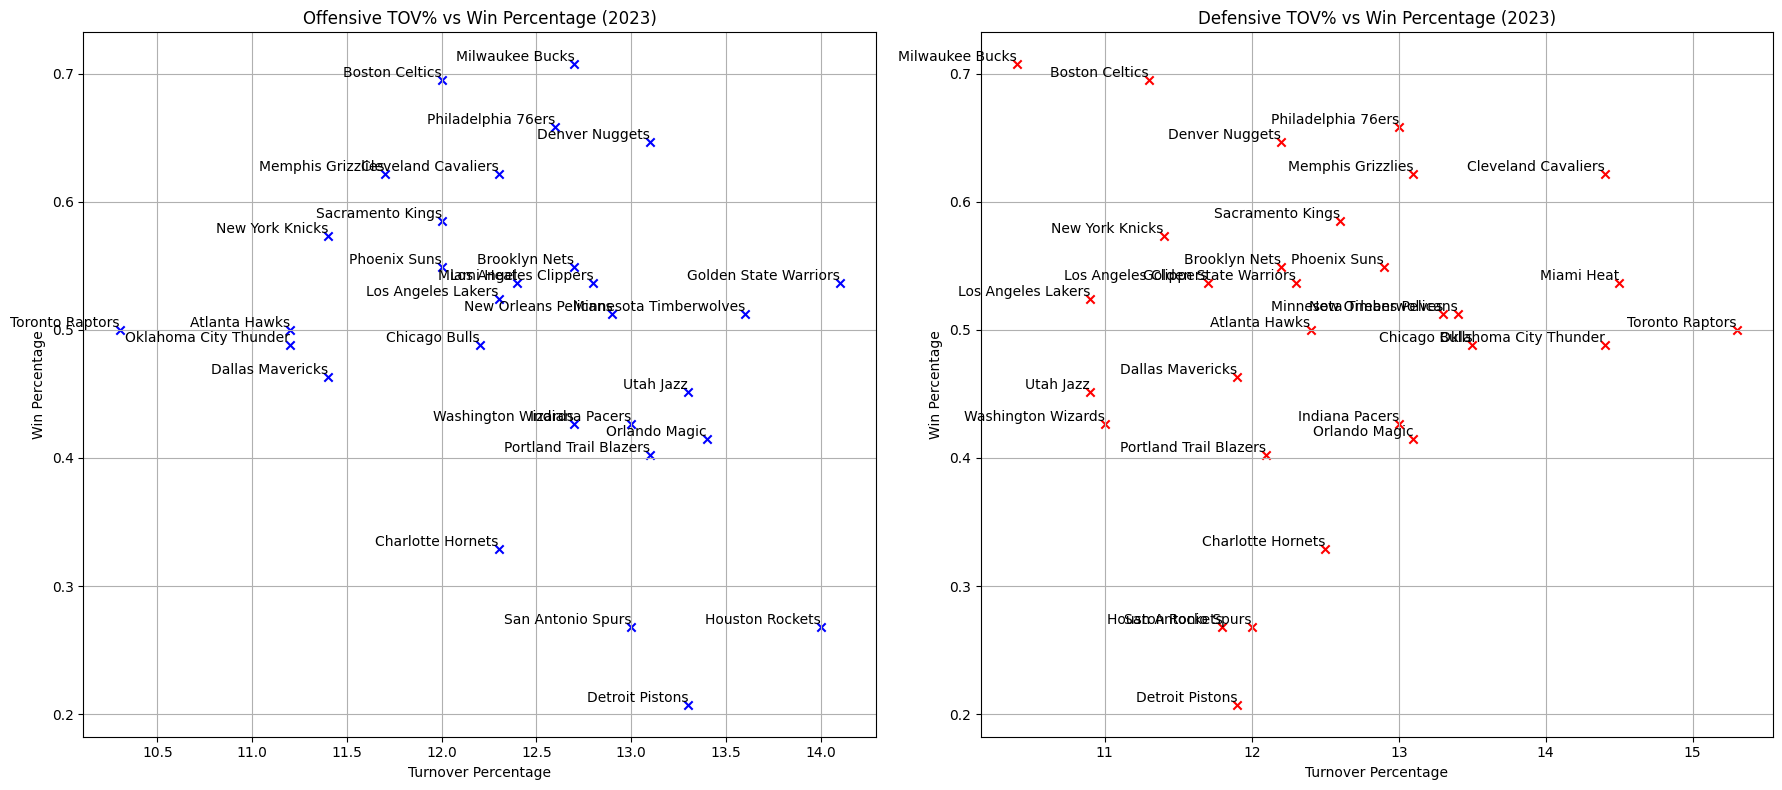

In [ ]:
selected_year = '2023'
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))

plot_factor_vs_win(axes[0], df1, selected_year, 'TOV%', 'Win%', 'blue', 'Turnover Percentage', f'Offensive TOV% vs Win Percentage ({selected_year})')
plot_factor_vs_win(axes[1], df1, selected_year, 'd_TOV%', 'Win%', 'red', 'Turnover Percentage', f'Defensive TOV% vs Win Percentage ({selected_year})')

plt.tight_layout()
plt.show()

The Turnover Percentage is a statistic used in basketball to assess how well a team or player takes care of the ball. It measures the percentage of a team's or player's possessions that end in a turnover.

Offensive Turnover Percentage measures how frequently a team or player turns the ball over on the offensive end. Lower values are better as they indicate that a team or player is less likely to commit a turnover.

Defensive Turnover Percentage looks at how often a team or player forces turnovers from their opponents. A higher Defensive TOV% indicates that the team or player is effective at causing the opponent to turn the ball over.

In both metrics, turnovers are seen as missed opportunities on the offensive side and opportunities to gain possession on the defensive side. Therefore, teams aim for a low Offensive TOV% (indicating they take care of the ball) and a high Defensive TOV% (indicating they're good at forcing turnovers).

From the scatterplot in our analysis, we see that Turnover Percentage (both offensive and defensive) is not strongly correlated with winning percentage, especially when compared to eFG%.

We observe that the Toronto Raptors have the most efficient turnover percentage in both offense and defense but only have a winning percentage slightly above 50%. In contrast, the Bucks, who have the highest winning percentage, also have the lowest defensive turnover percentage for the season and a league-average offensive turnover.

This suggests that turnover percentage may not be a strong indicator of a team's winning percentage. For example, if we consider the Golden State Warriors, who had the highest turnovers for the season, they still have a higher winning percentage compared to the Toronto Raptors.


## Rebound Percentage vs Winning Percentage

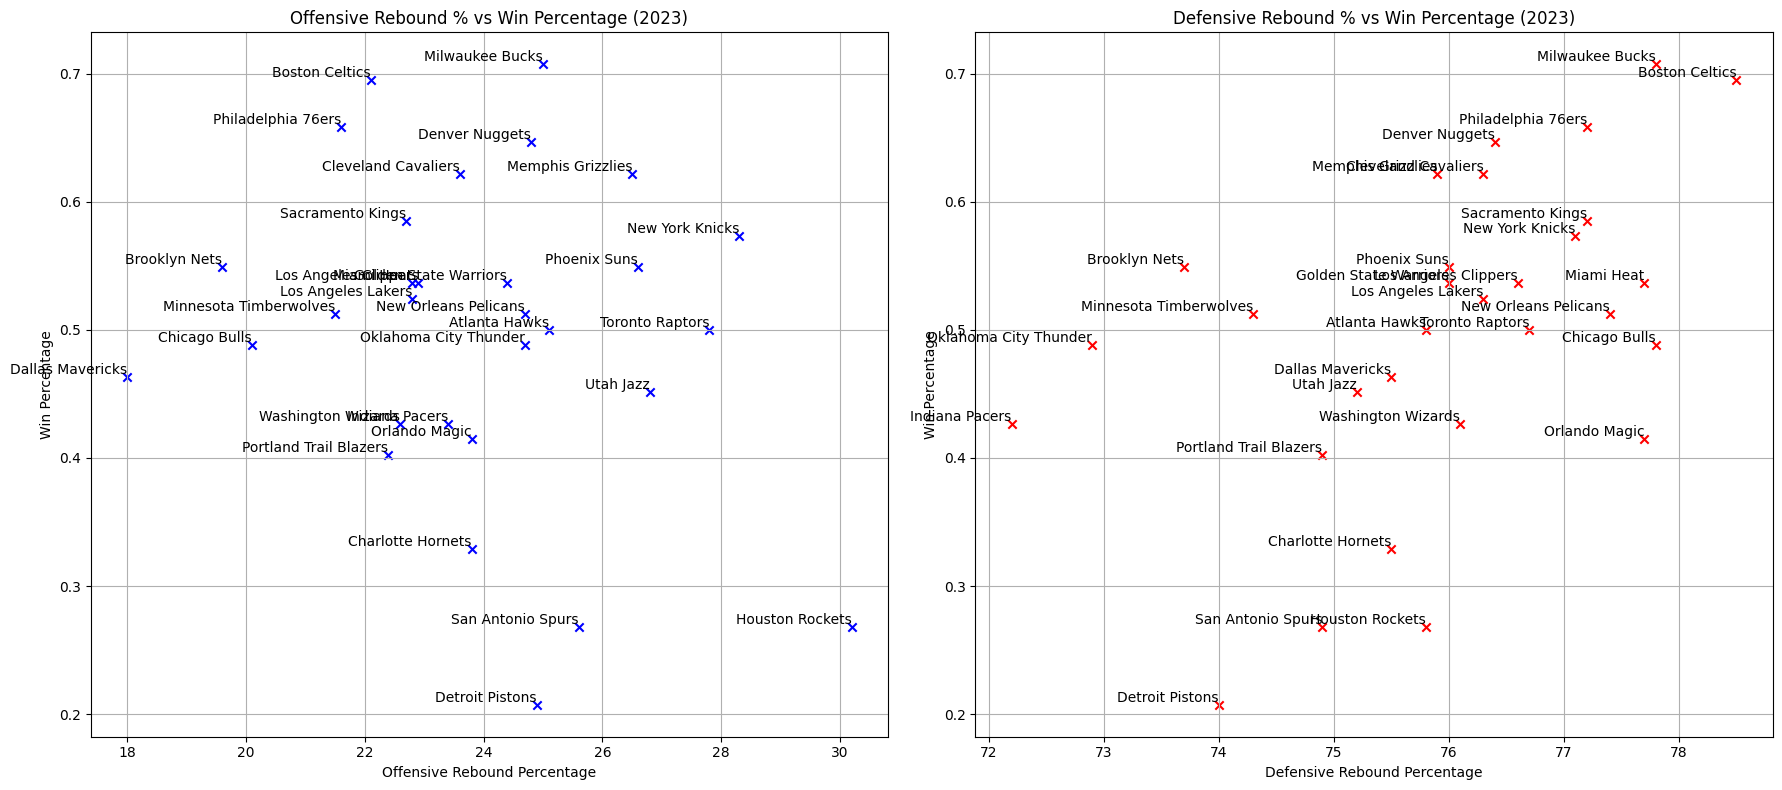

In [ ]:
selected_year = '2023'
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))

plot_factor_vs_win(axes[0], df1, selected_year, 'ORB%', 'Win%', 'blue', 'Offensive Rebound Percentage', f'Offensive Rebound % vs Win Percentage ({selected_year})')
plot_factor_vs_win(axes[1], df1, selected_year, 'DRB%', 'Win%', 'red', 'Defensive Rebound Percentage', f'Defensive Rebound % vs Win Percentage ({selected_year})')

plt.tight_layout()
plt.show()

Rebound Percentage is a statistic used in basketball to assess a team's or player's rebounding prowess relative to the number of available rebounds.

Offensive Rebound Percentage (ORB%): This metric estimates the percentage of available offensive rebounds (i.e., rebounds off missed shots by the team) that a team or player grabbed. It's an indicator of how well a team or player is at securing second-chance opportunities after missed shots.

A higher ORB% means that a team or player is effective at grabbing offensive rebounds, giving the team more chances to score.

Defensive Rebound Percentage (DRB%): This metric estimates the percentage of available defensive rebounds (i.e., rebounds off missed shots by the opponents) that a team or player secured. It gives an indication of how well a team or player is at preventing the opposing team from getting second-chance opportunities.

A higher DRB% means that a team or player is good at securing defensive rebounds, ensuring that the opposing team gets fewer opportunities to score.

The charts show that for offensive rebounds, the Houston Rockets are the most effective in grabbing offensive rebounds, yet they have one of the lowest winning percentages of the 2023 League season. The offensive rebound percentage measure is not quite straightforward, as a team with a high eFG% is effectively shooting efficiently, which may mean they are making more of their shots and therefore have fewer opportunities for offensive rebounds, compared to a team with a low eFG% who may miss a lot more shots and have more opportunities for offensive rebounds. This appears to be the case with the Houston Rockets as they have the worst eFG% percentage for the season, hence the high number of offensive rebounds, which shows a negative correlation between eFG% and ORB%. However, this negative correlation does not always hold true, as we can see that the Denver Nuggets, although having the highest eFG%, did not have the lowest ORB%, which shows that although they have fewer second-chance opportunities, they were more effective at grabbing offensive rebounds than other teams.

Now, when we assess defensive rebounds, we see a positive correlation between DRB% and winning percentages. It shows that teams who are able to secure defensive rebounds (preventing opponents from getting second chance opportunities) appear to win more games. This makes sense because you are effectively minimizing your opponents' chances to gain second chance opportunities on missed shots and transitioning this into offensive plays. From the plot, it appears that the Bucks and Celtics were the most effective at this, being the two teams with the highest winning percentage.

The DRB% appears to be a good indicator, along with eFG%, for predicting wins.

## Free Throws Per Field Goal Attempt vs Winning Percentage

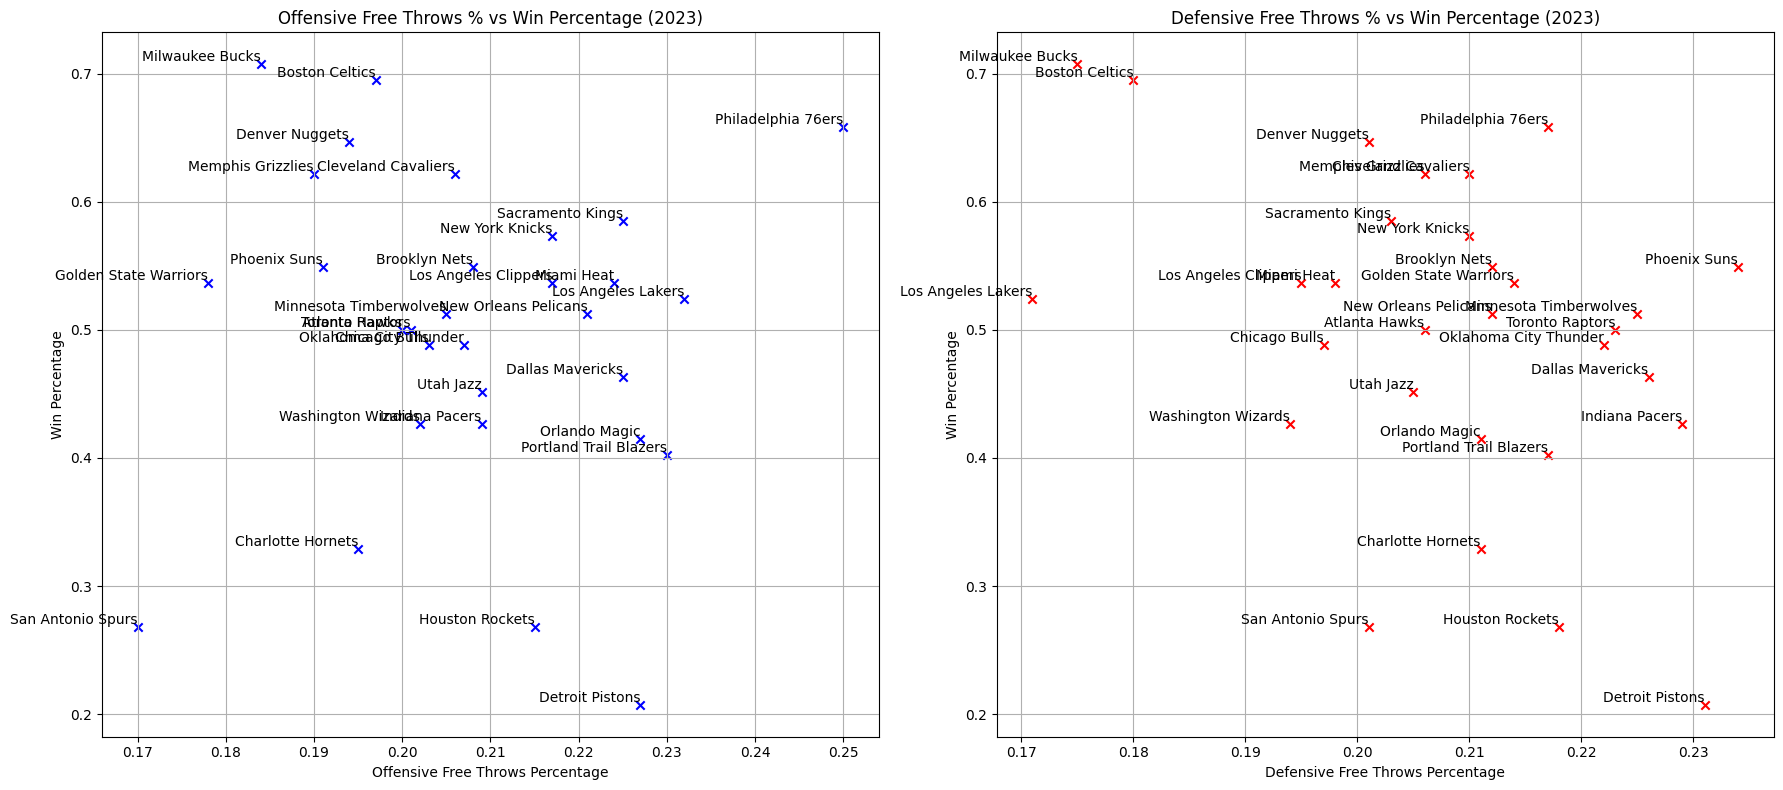

In [ ]:
selected_year = '2023'
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))

plot_factor_vs_win(axes[0], df1, selected_year, 'FT/FGA', 'Win%', 'blue', 'Offensive Free Throws Percentage', f'Offensive Free Throws % vs Win Percentage ({selected_year})')
plot_factor_vs_win(axes[1], df1, selected_year, 'd_FT/FGA', 'Win%', 'red', 'Defensive Free Throws Percentage', f'Defensive Free Throws % vs Win Percentage ({selected_year})')

plt.tight_layout()
plt.show()

Free Throws Per Field Goal Attempt (FT/FGA) is a statistic used in basketball to assess a team's or player's ability to get to the free-throw line relative to how often they shoot the ball. It provides insight into a team's or player's aggressiveness and their ability to draw fouls.

Offensive Free Throws Per Field Goal Attempt (Offensive FT/FGA) measures a team's or player's ability to get to the free-throw line in relation to how many shots they take. A higher ratio indicates that the team or player is effective at drawing fouls when they shoot, which can be a sign of aggressive play, especially in driving to the basket.

Defensive Free Throws Per Field Goal Attempt (Defensive FT/FGA) measures how often a team or player fouls shooters, resulting in free throw opportunities for the opposing team.

A higher Defensive FT/FGA might indicate that a team or player is too aggressive on defense, leading to more fouls and giving the opponents more chances at the free-throw line.

From the plot,  we do not observe a correlation between FT/FGA and winning percentage. Teams with high winning percentage ranging in having a low and high ratio on offense and defence which signals that a correlation a signifcantly low.

## Visuialisation Insights

After analyzing all four factors, I can conclude that eFG% and DRB% are the most significant factors in my opinion. It makes sense why these two stand out. eFG% measures how effectively teams score and defend against opponents' scoring. DRB% measures a team's effectiveness in preventing opponents from getting second-chance scoring opportunities. Essentially, those who can outscore their opponents while preventing them from scoring at will win the game, and both of these factors measure this the most.

However, I cannot reach a conclusion based on just one season. I would like to plot the same charts for the past 10 seasons to see if we observe a similar trend. Additionally, I plan to conduct statistical analyses to confirm whether my theory holds true regarding both offensive and defensive eFG% and DRB% being the most significant factors influencing winning.

# 10 Year Analysis

### Effective Field Goal Percentage vs Win Percentage (10 Year Span)

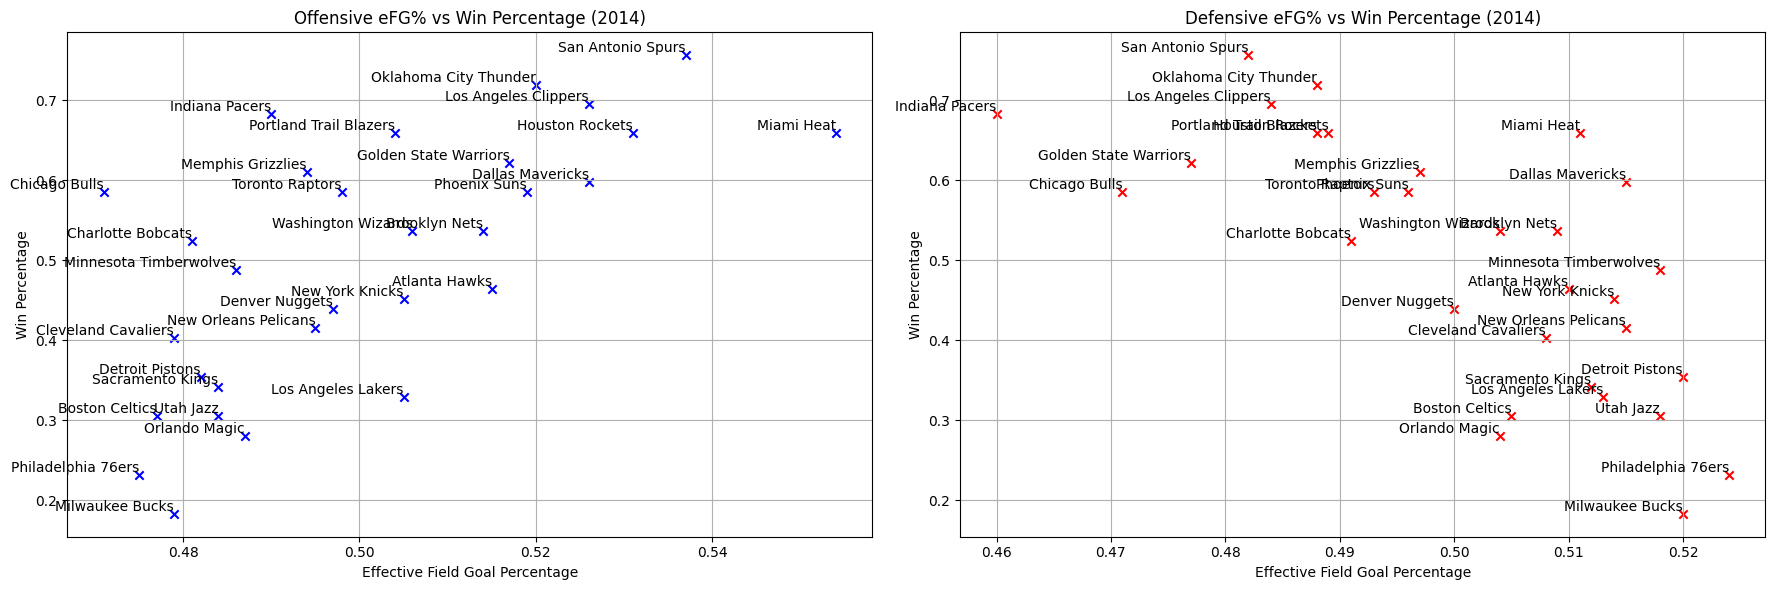

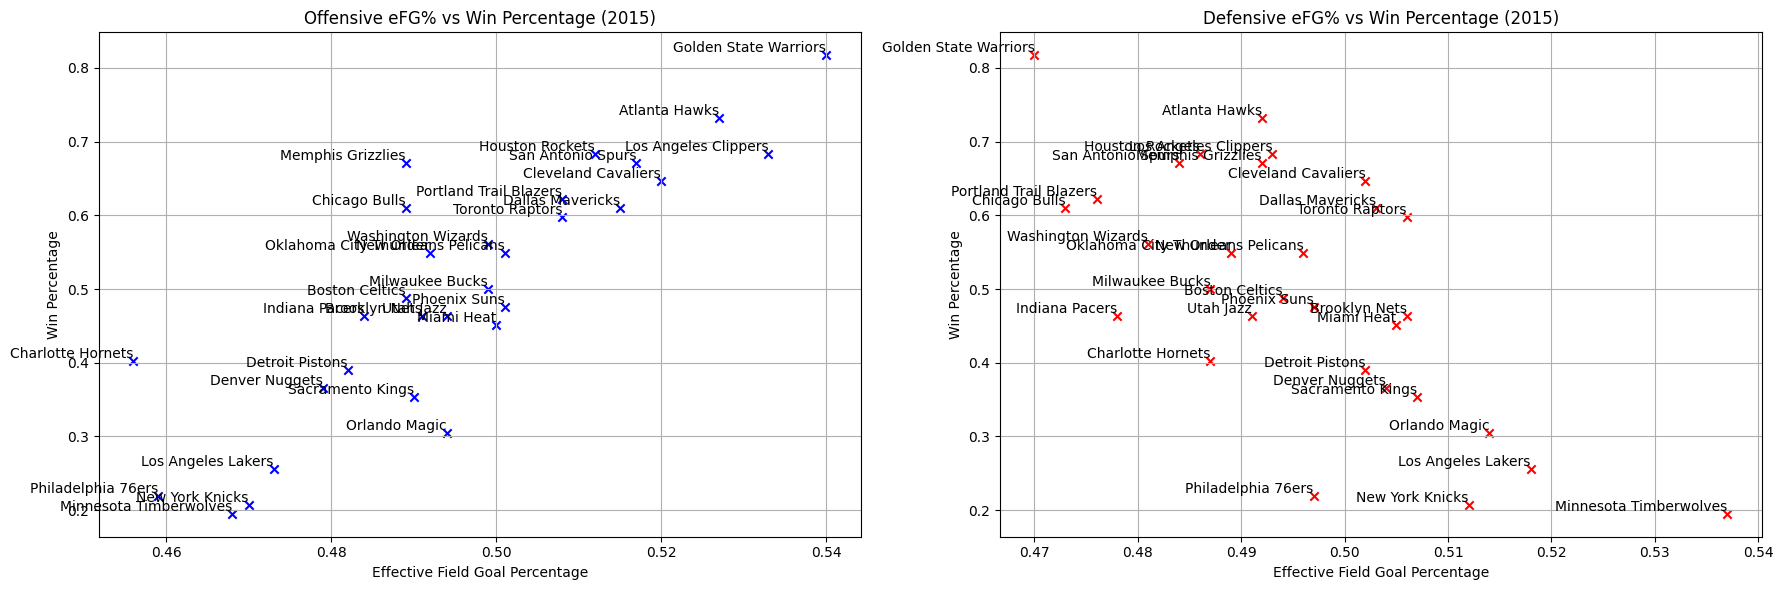

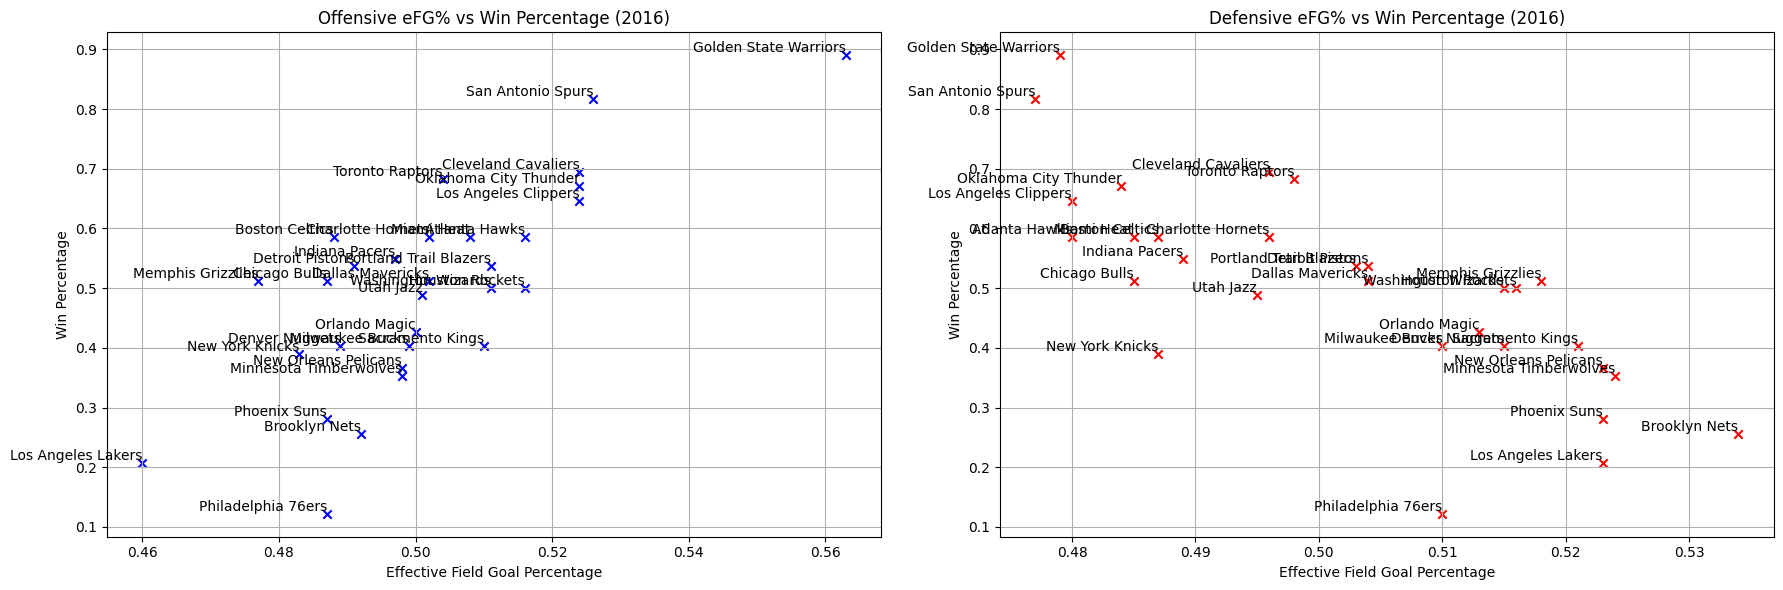

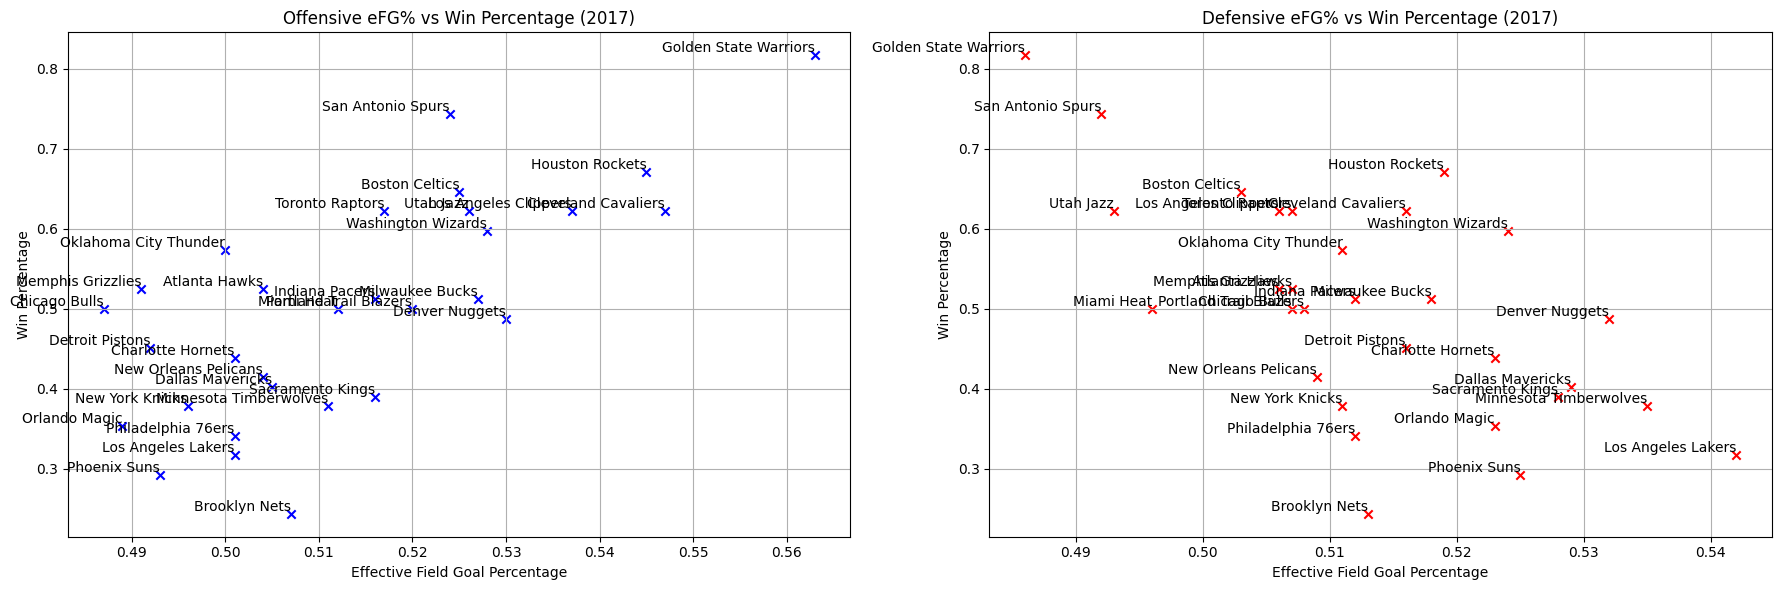

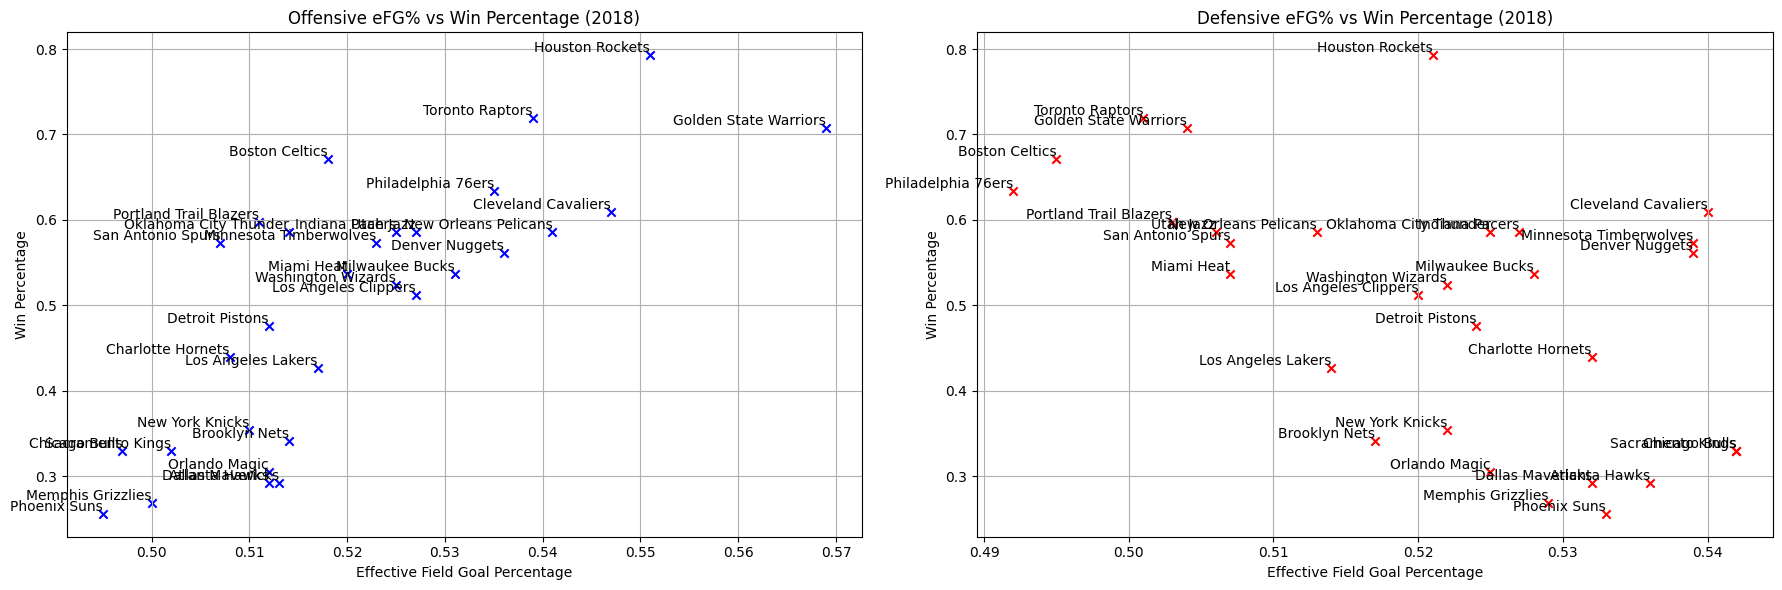

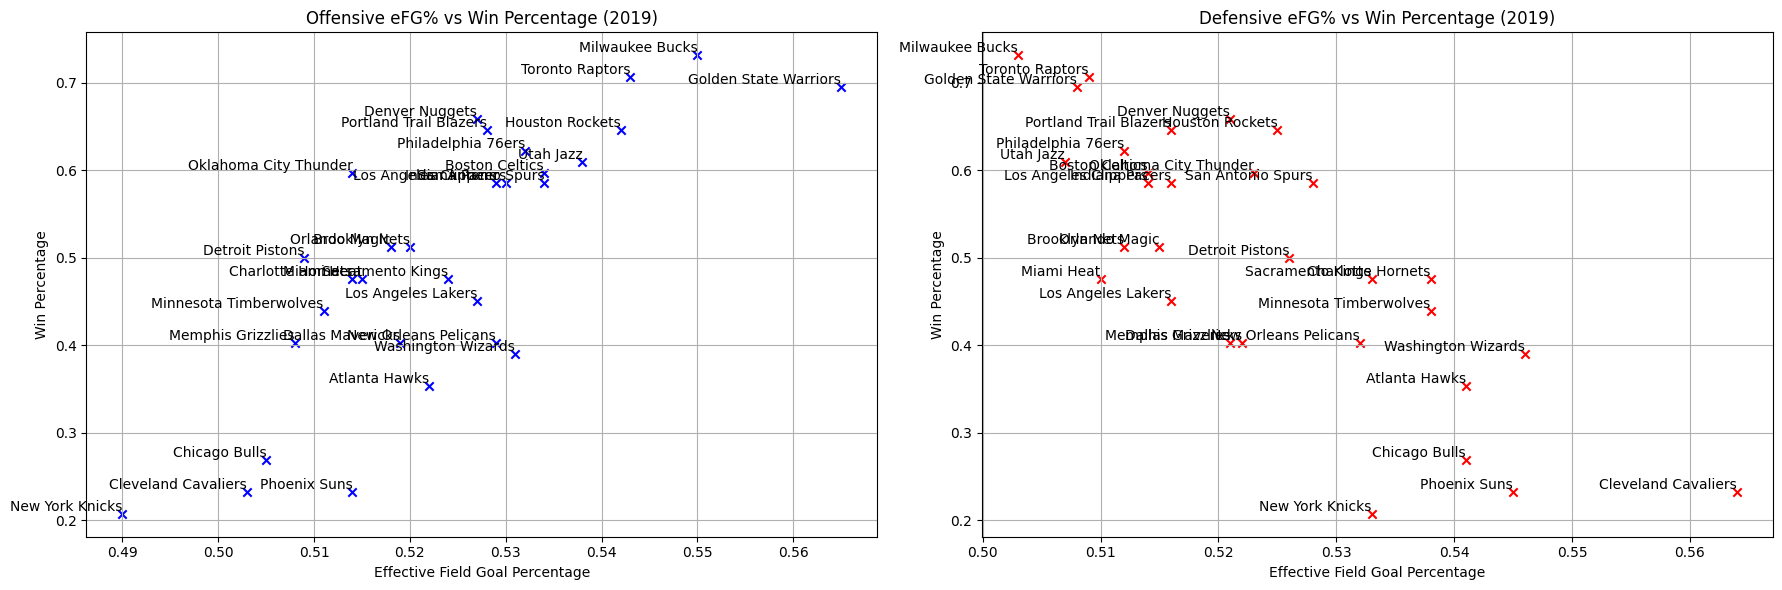

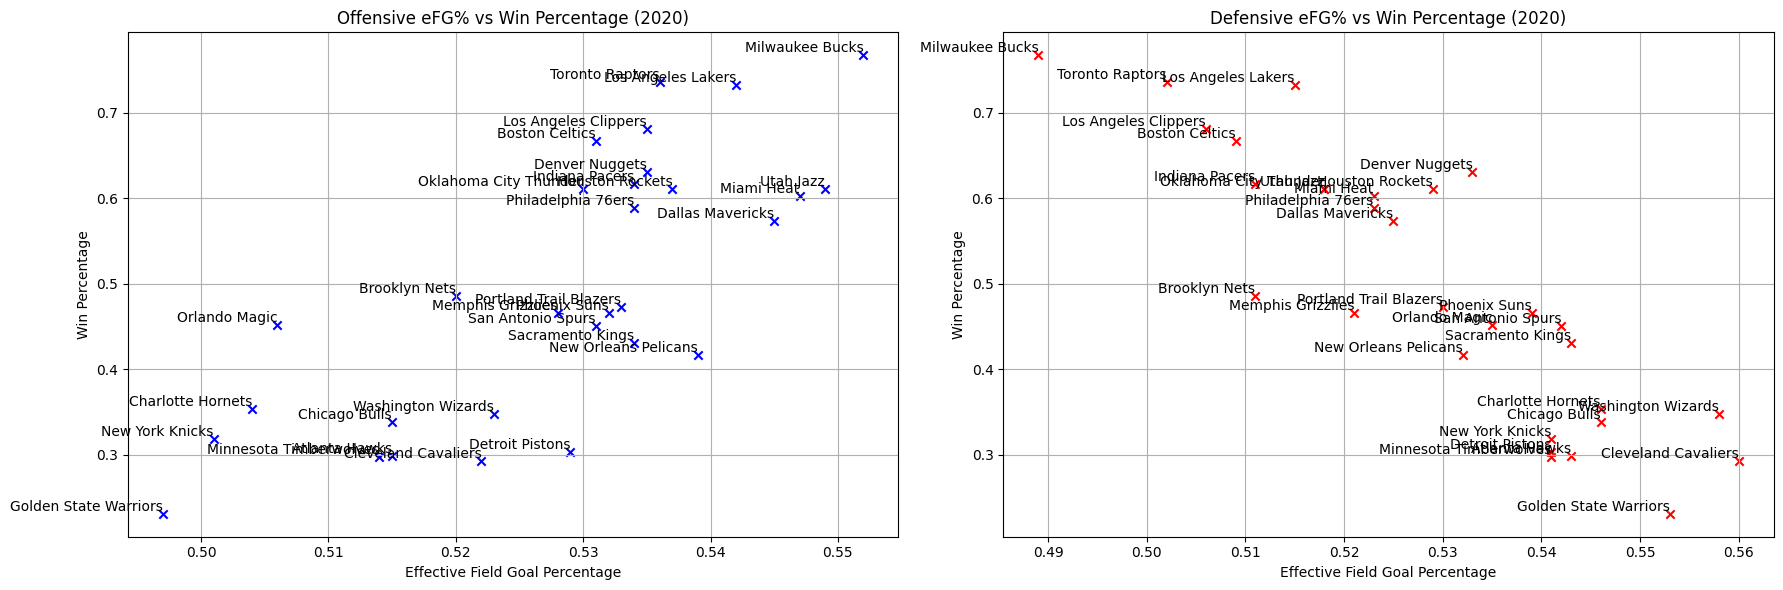

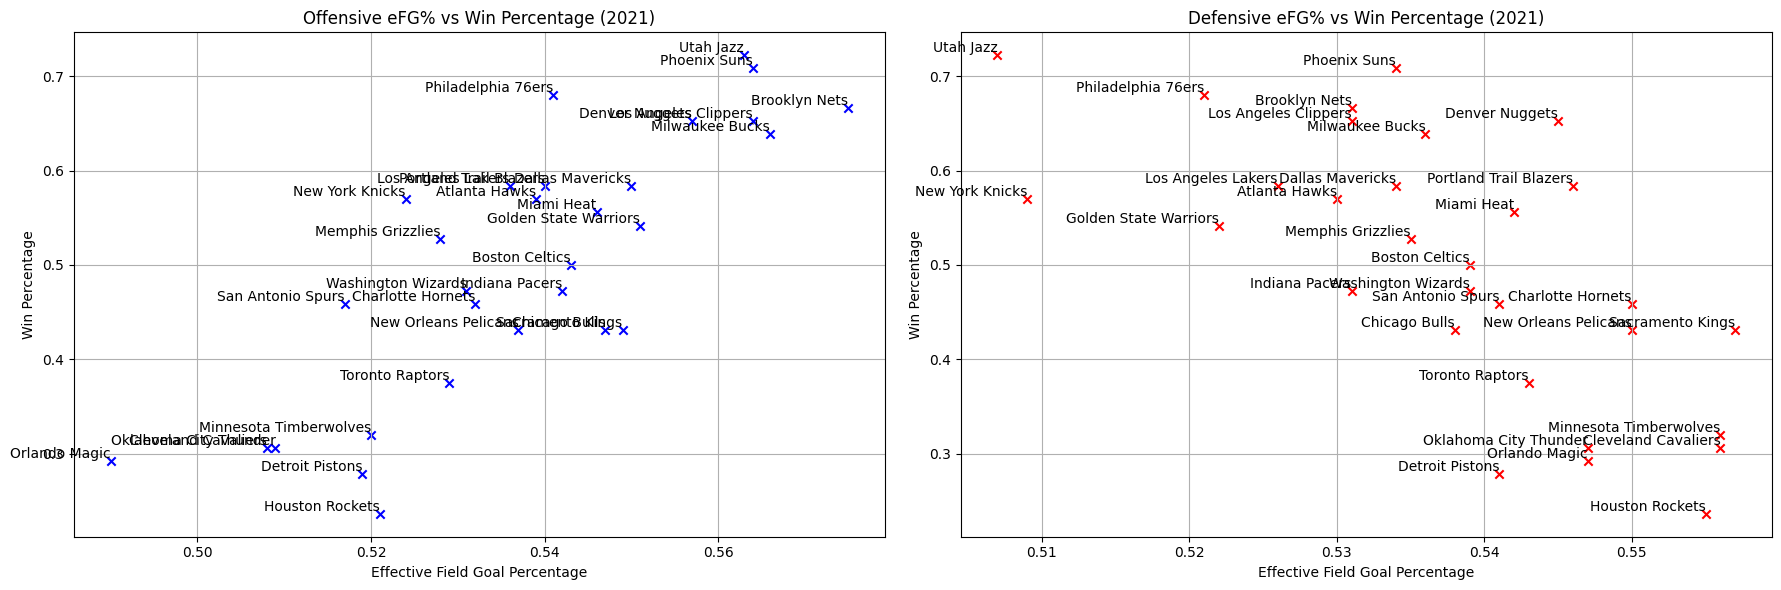

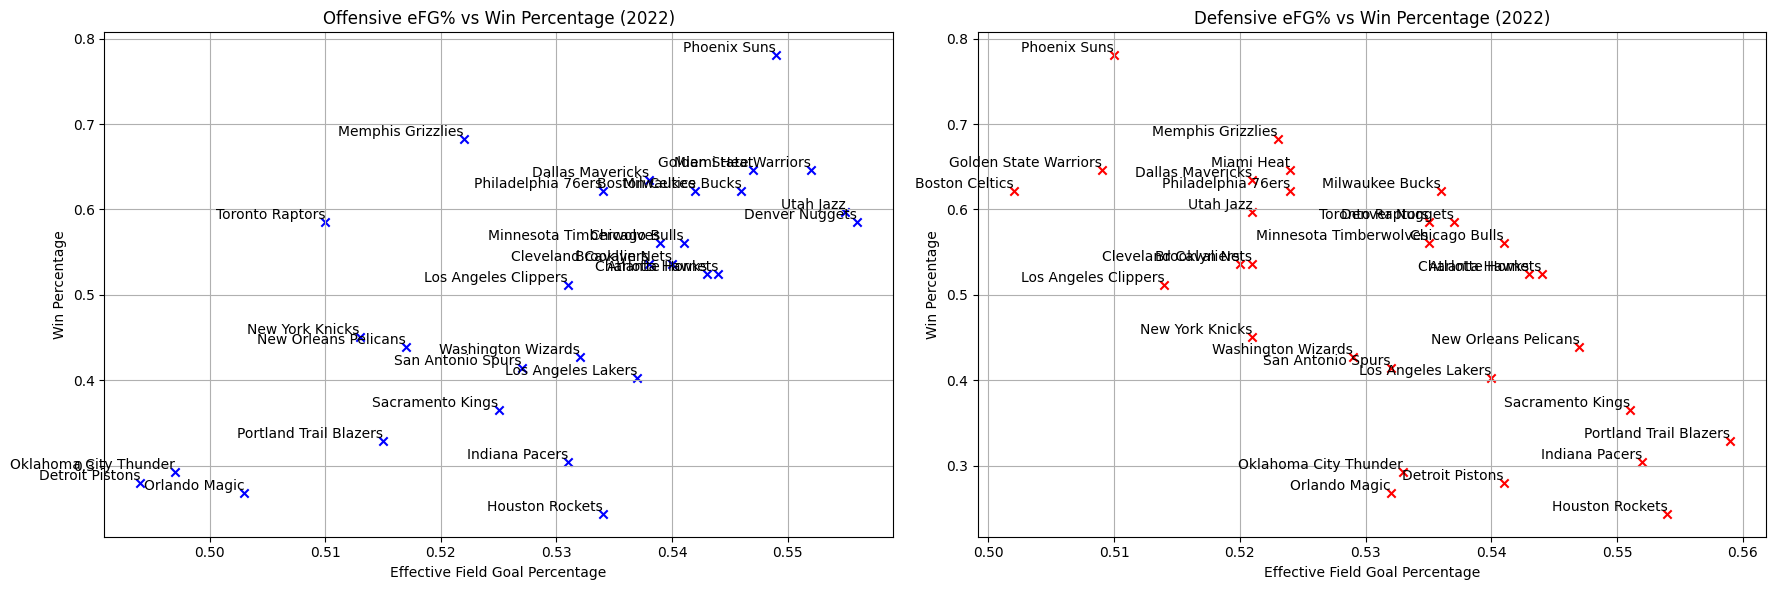

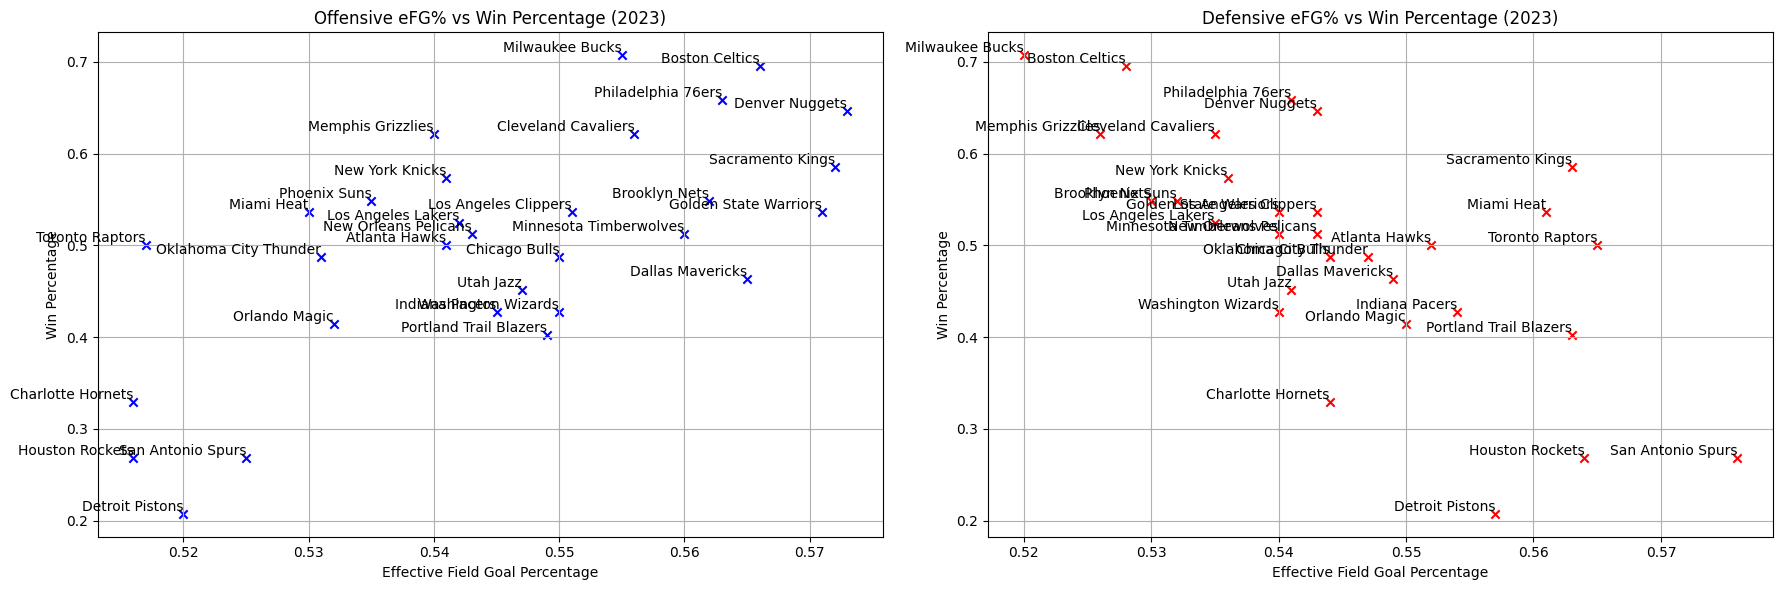

In [ ]:
for year in df1['Season'].unique():
  fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

  plot_factor_vs_win(axes[0], df1, year, 'eFG%', 'Win%', 'blue', 'Effective Field Goal Percentage', f'Offensive eFG% vs Win Percentage ({year})')
  plot_factor_vs_win(axes[1], df1, year, 'd_eFG%', 'Win%', 'red', 'Effective Field Goal Percentage', f'Defensive eFG% vs Win Percentage ({year})')

  plt.tight_layout()
  plt.show()

### Turnover Percentage vs Win Percentage (10 Year Span)

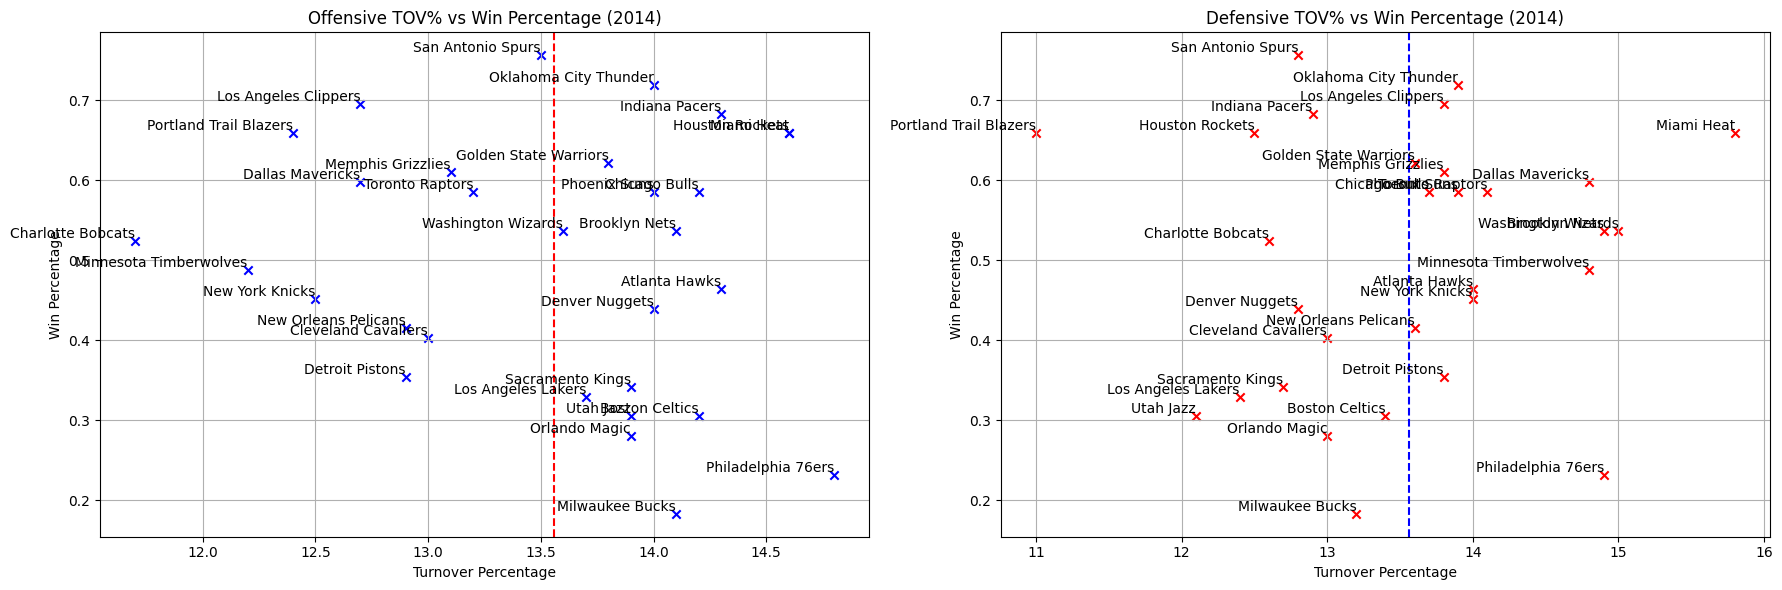

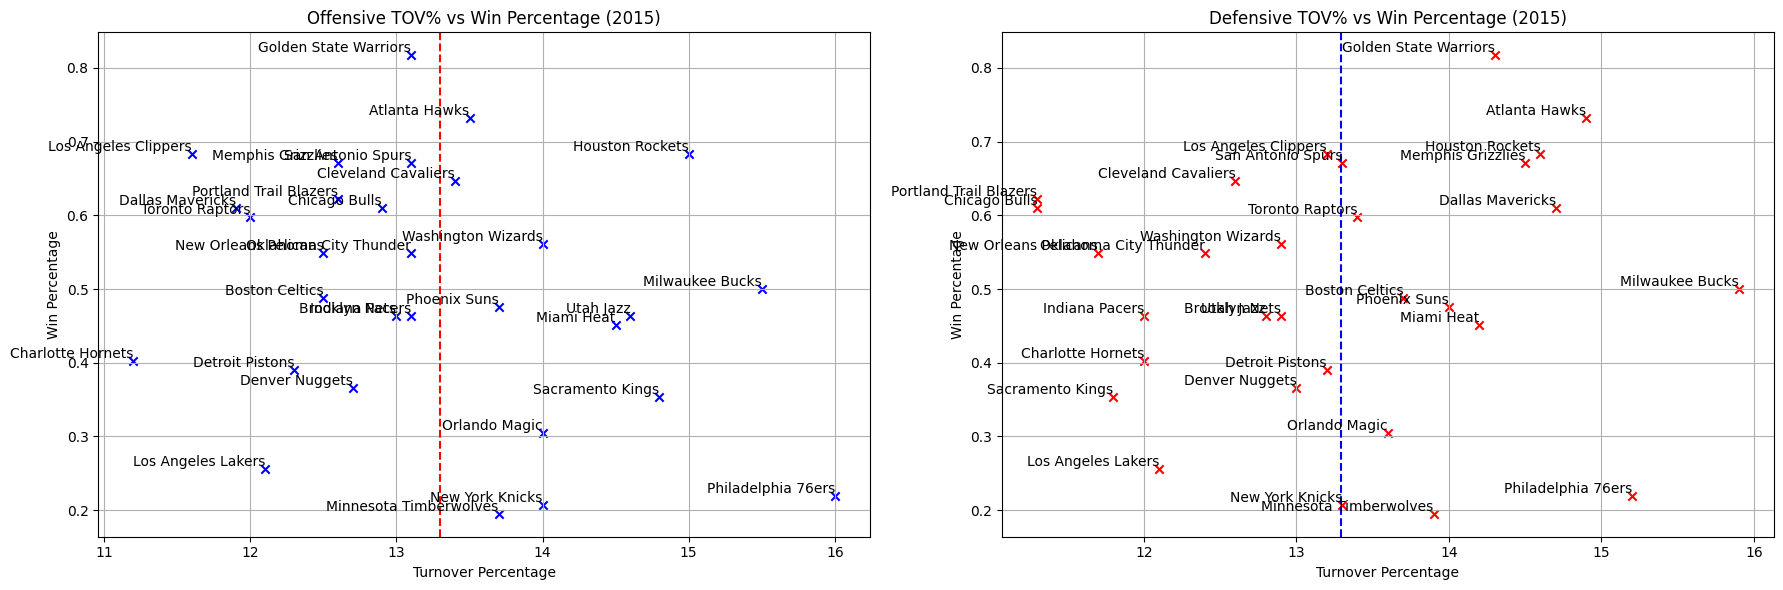

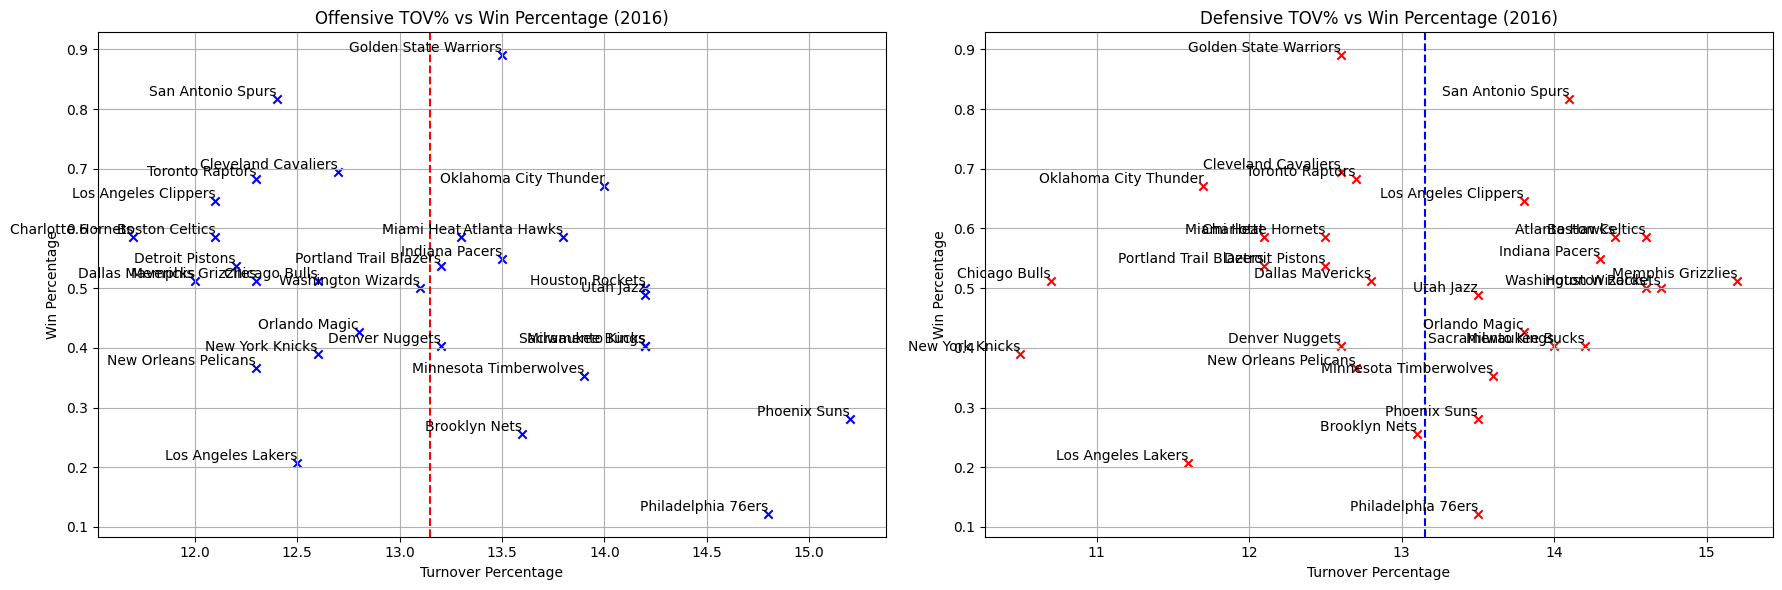

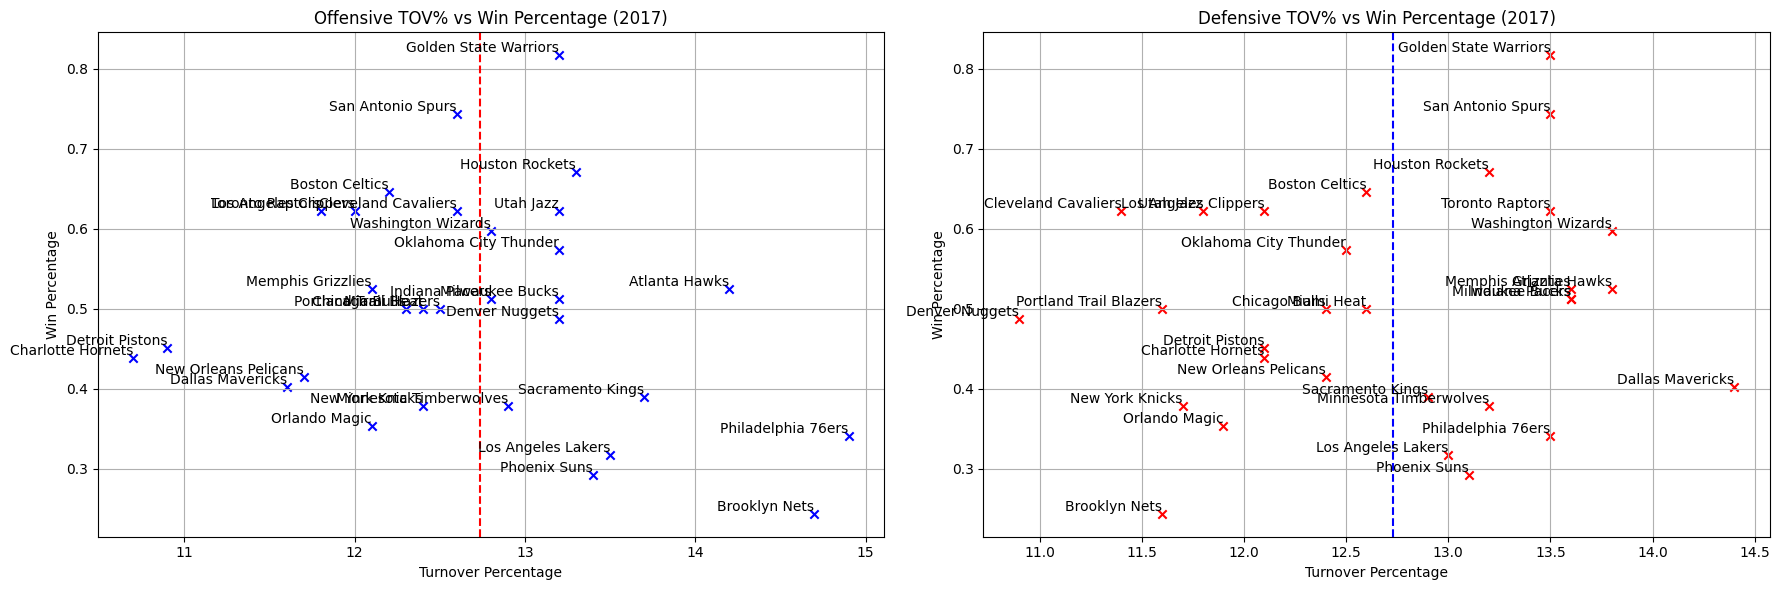

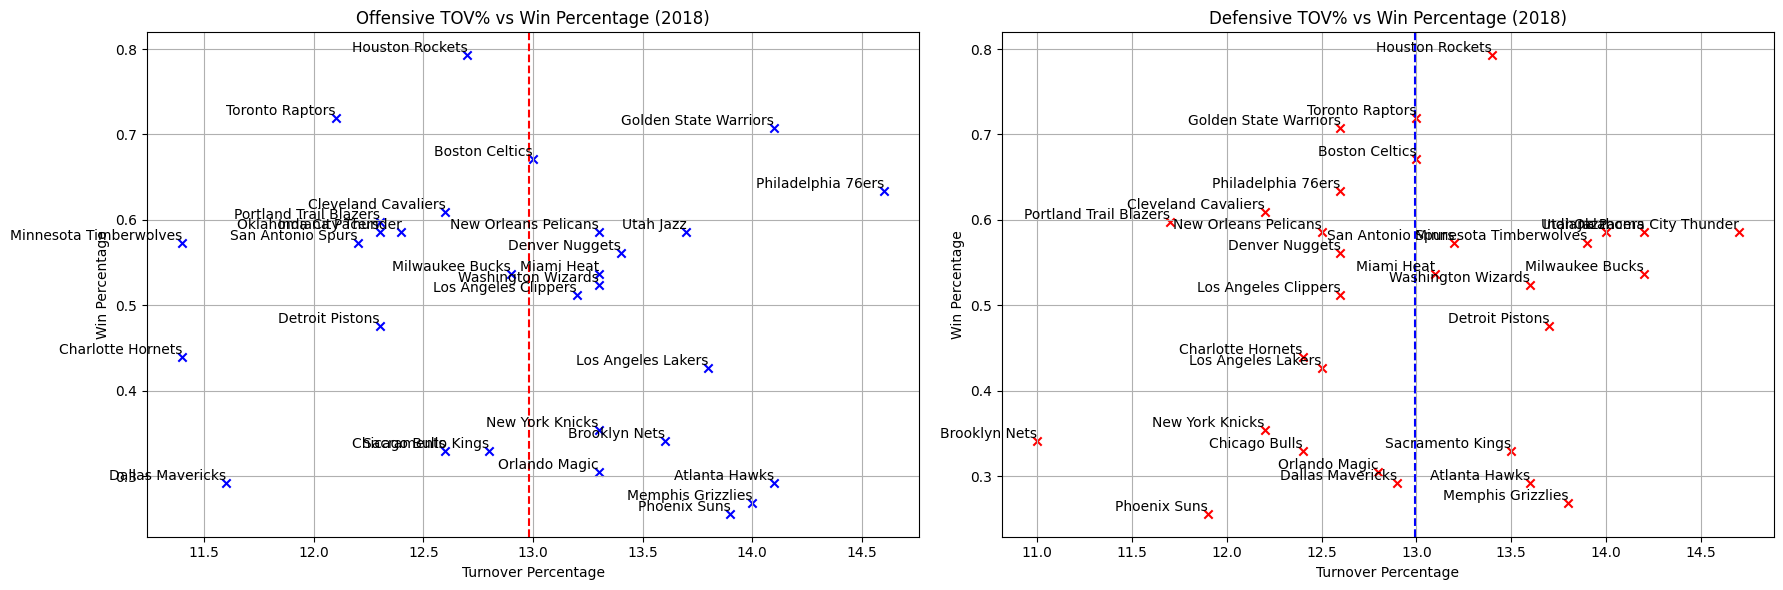

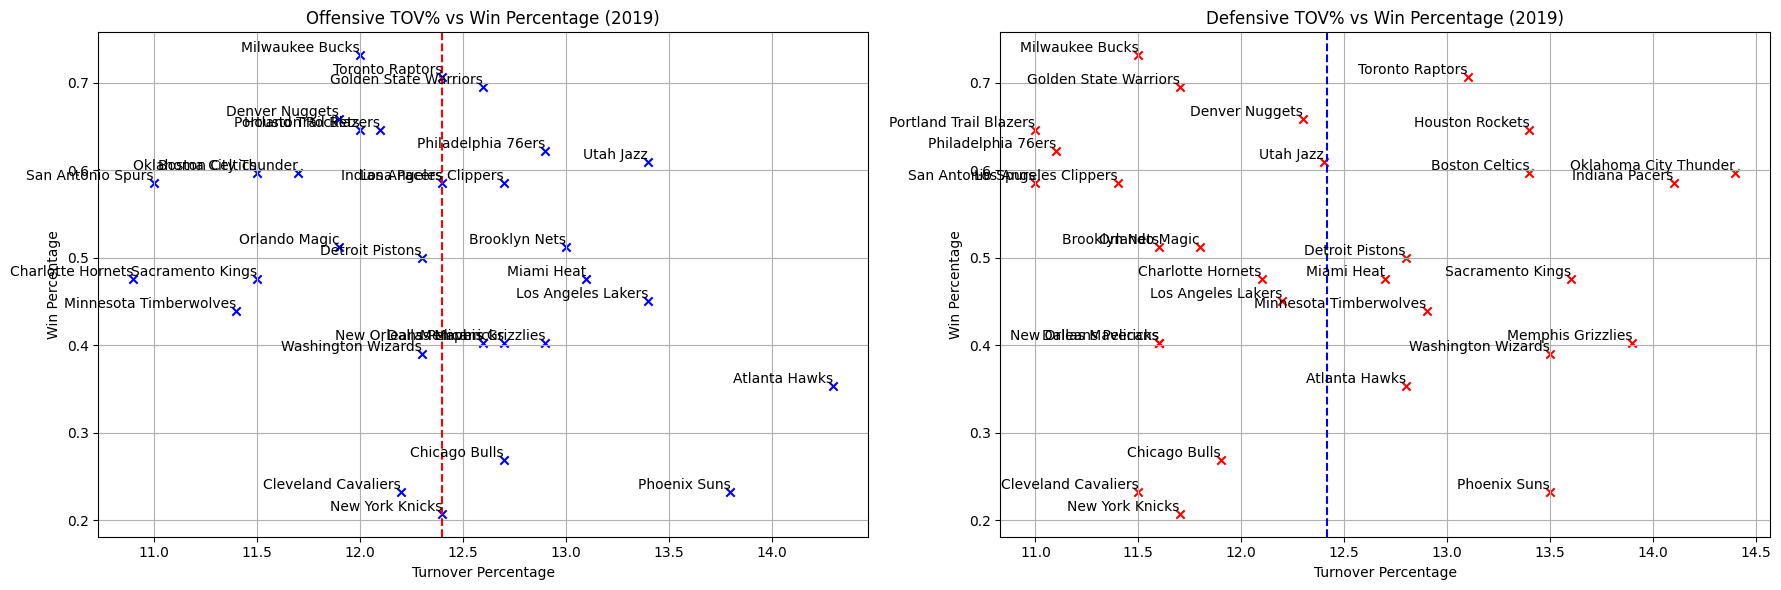

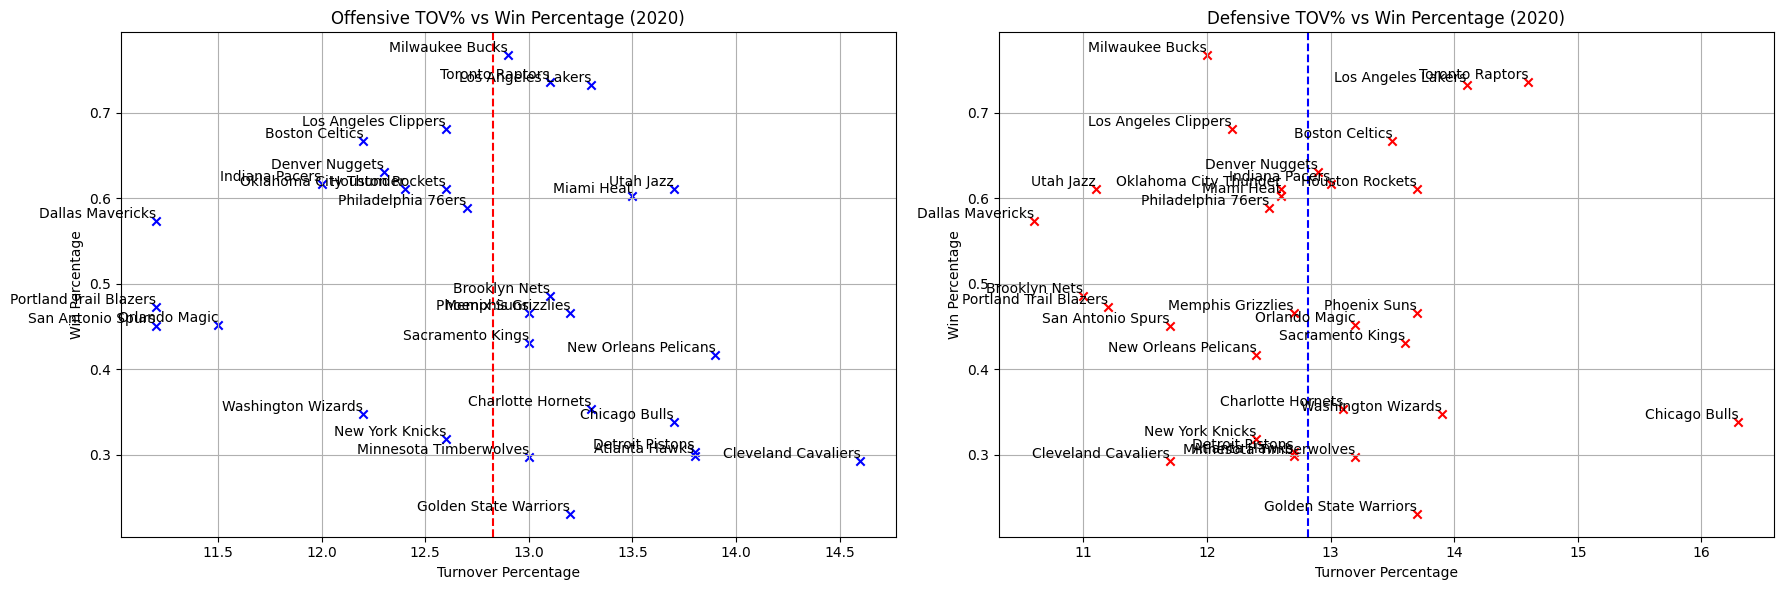

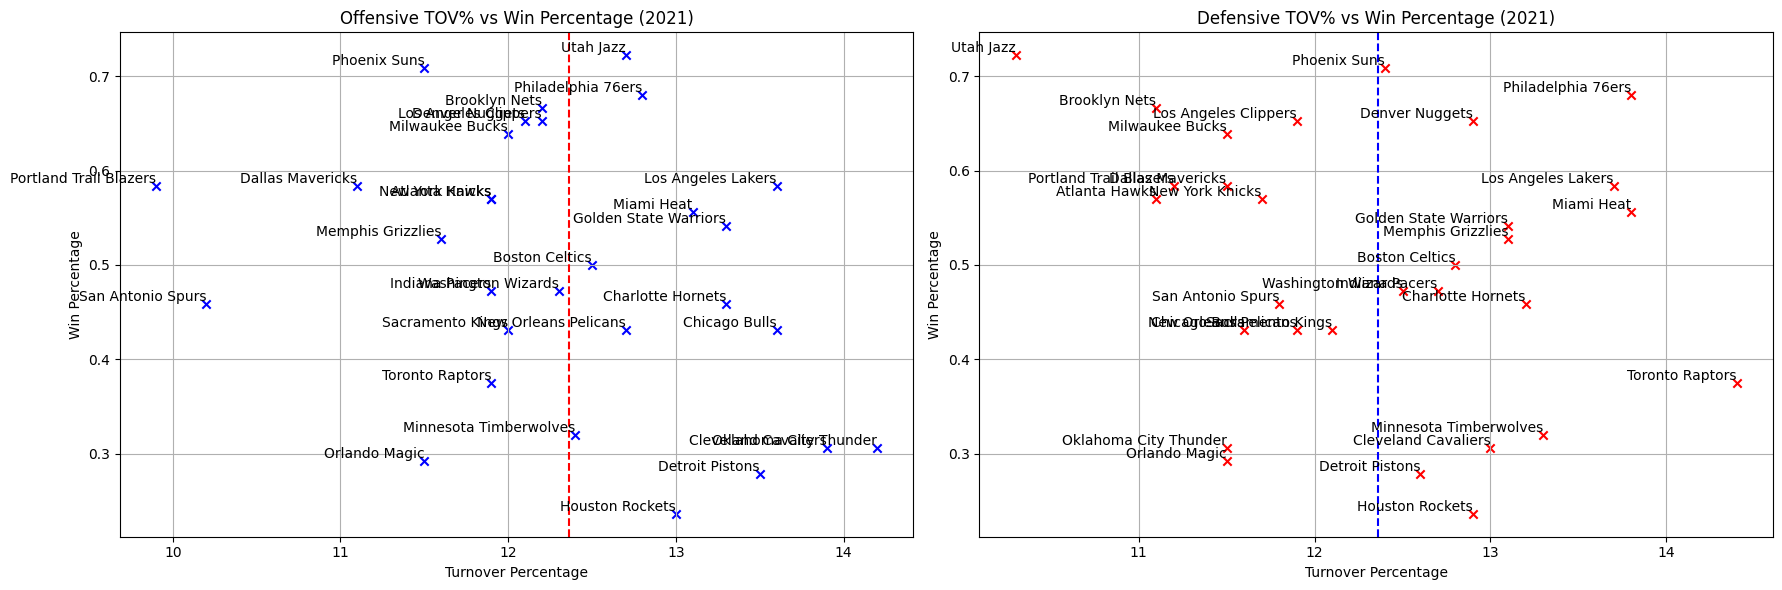

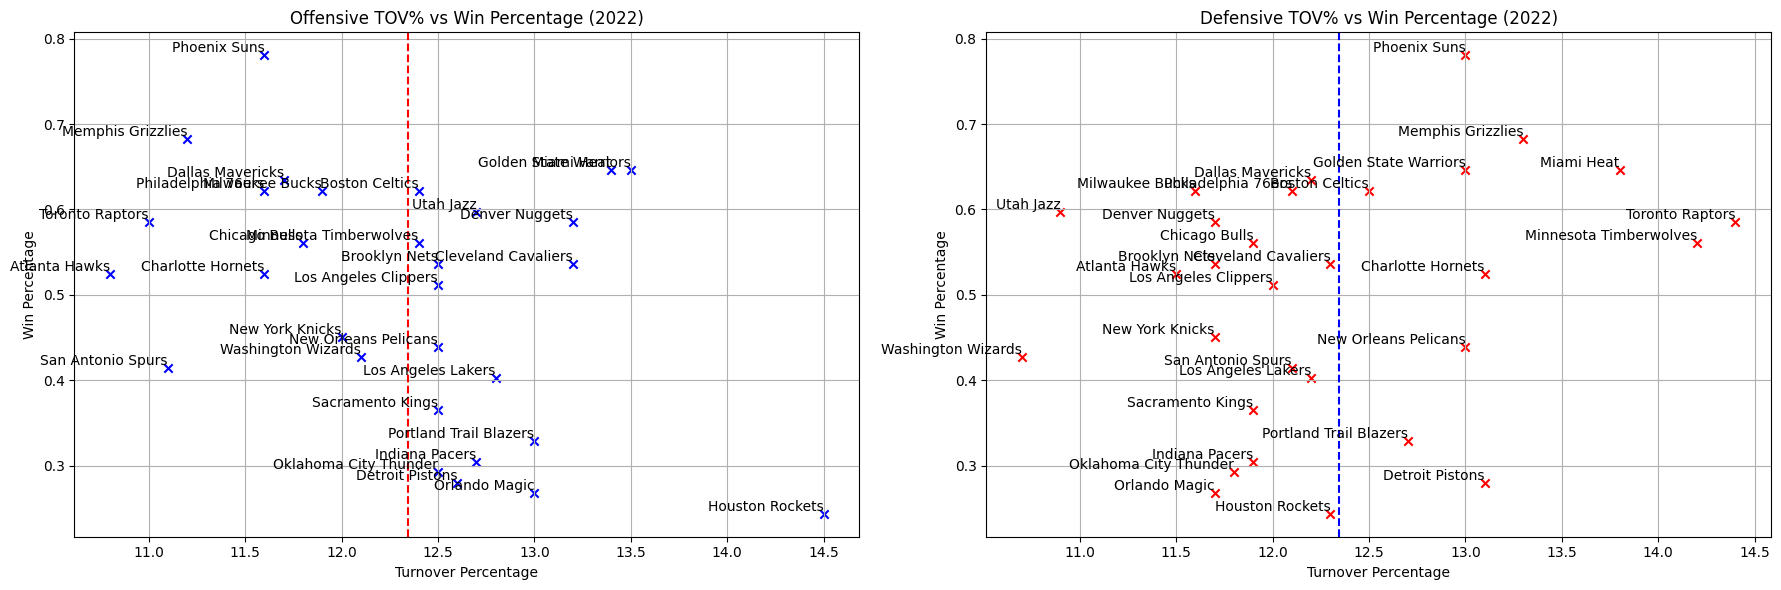

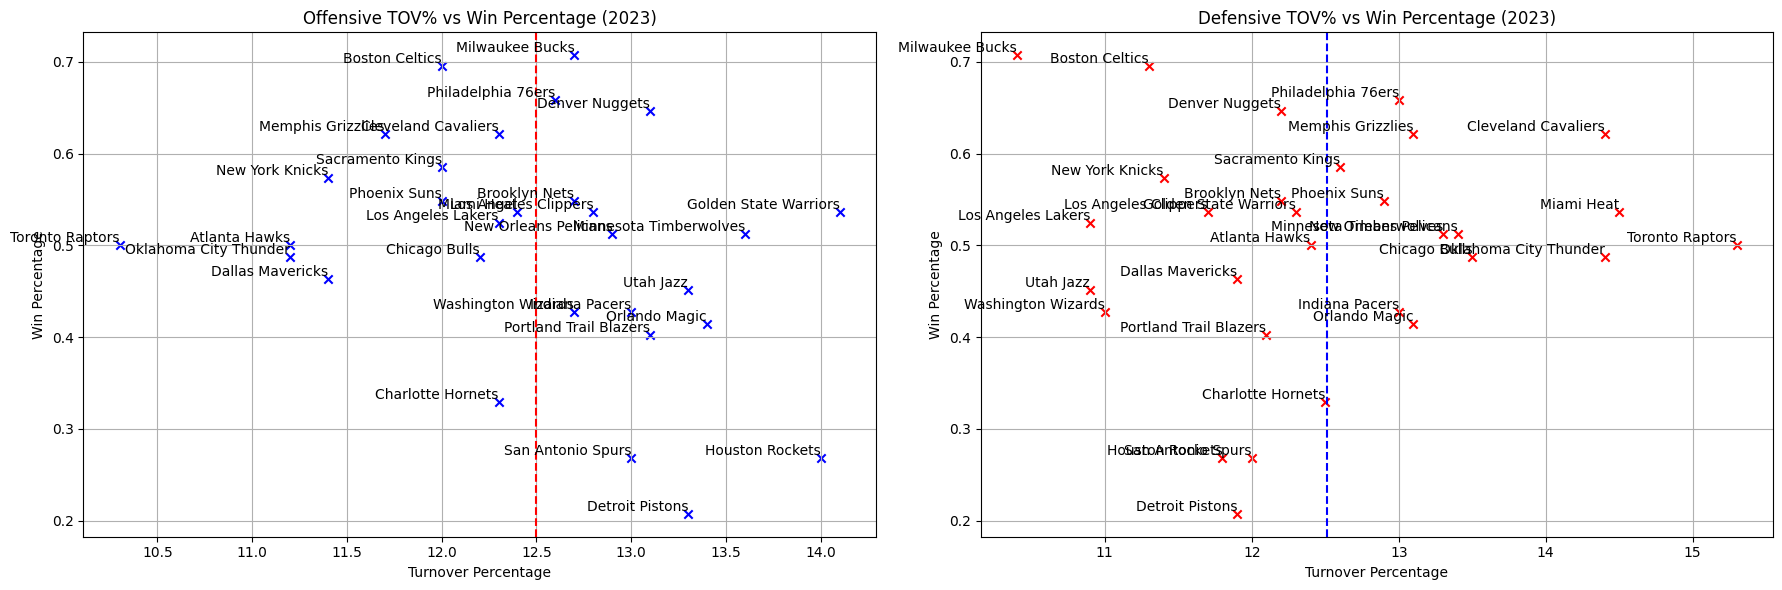

In [ ]:
for year in df1['Season'].unique():
  fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

  avg_tov = df1[df1['Season'] == year]['TOV%'].sum() / 30
  avg_dtov = df1[df1['Season'] == year]['d_TOV%'].sum() / 30

  plot_factor_vs_win(axes[0], df1, year, 'TOV%', 'Win%', 'blue', 'Turnover Percentage', f'Offensive TOV% vs Win Percentage ({year})')
  axes[0].axvline(x=avg_tov, color='r', linestyle='--')
  plot_factor_vs_win(axes[1], df1, year, 'd_TOV%', 'Win%', 'red', 'Turnover Percentage', f'Defensive TOV% vs Win Percentage ({year})')
  axes[1].axvline(x=avg_dtov, color='b', linestyle='--')

  plt.tight_layout()
  plt.show()

### Rebound Percentage vs Win Percentage (10 Year Span)

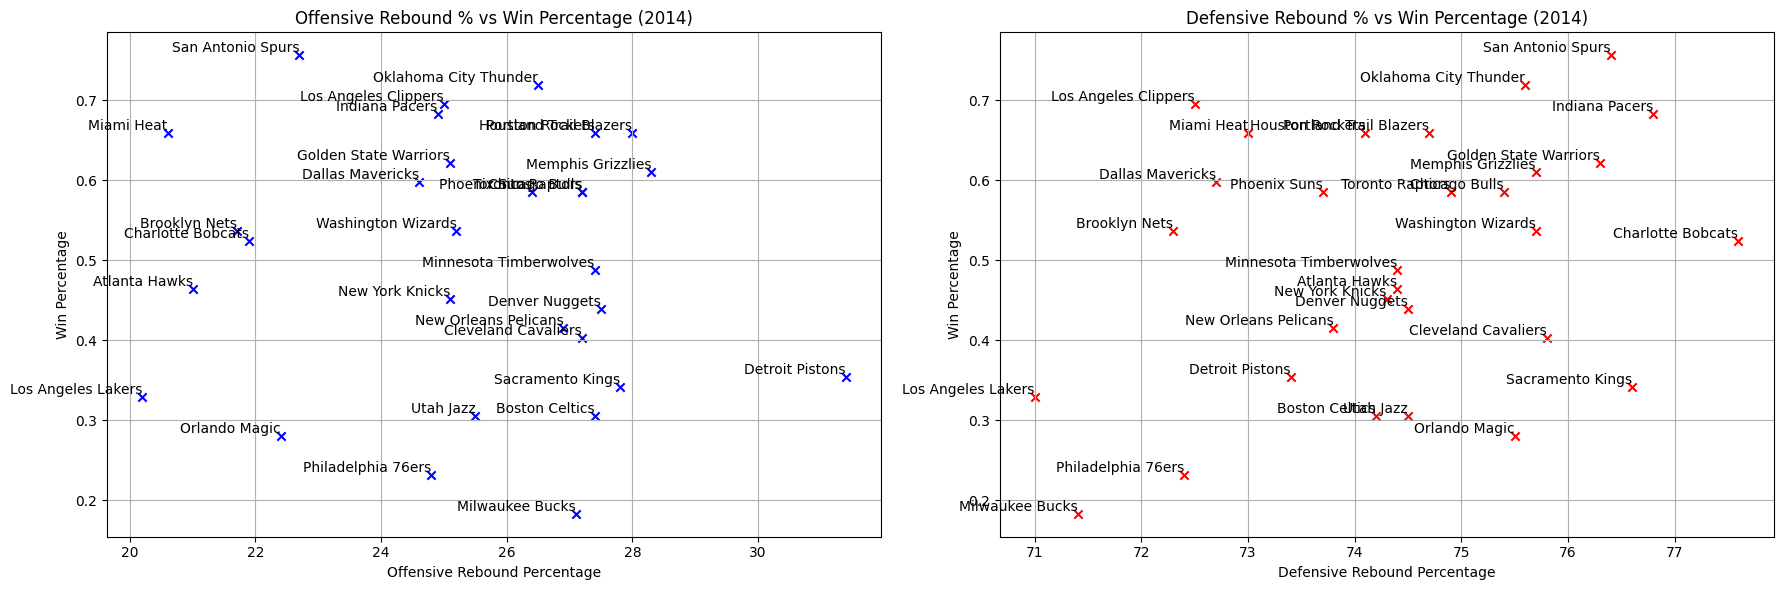

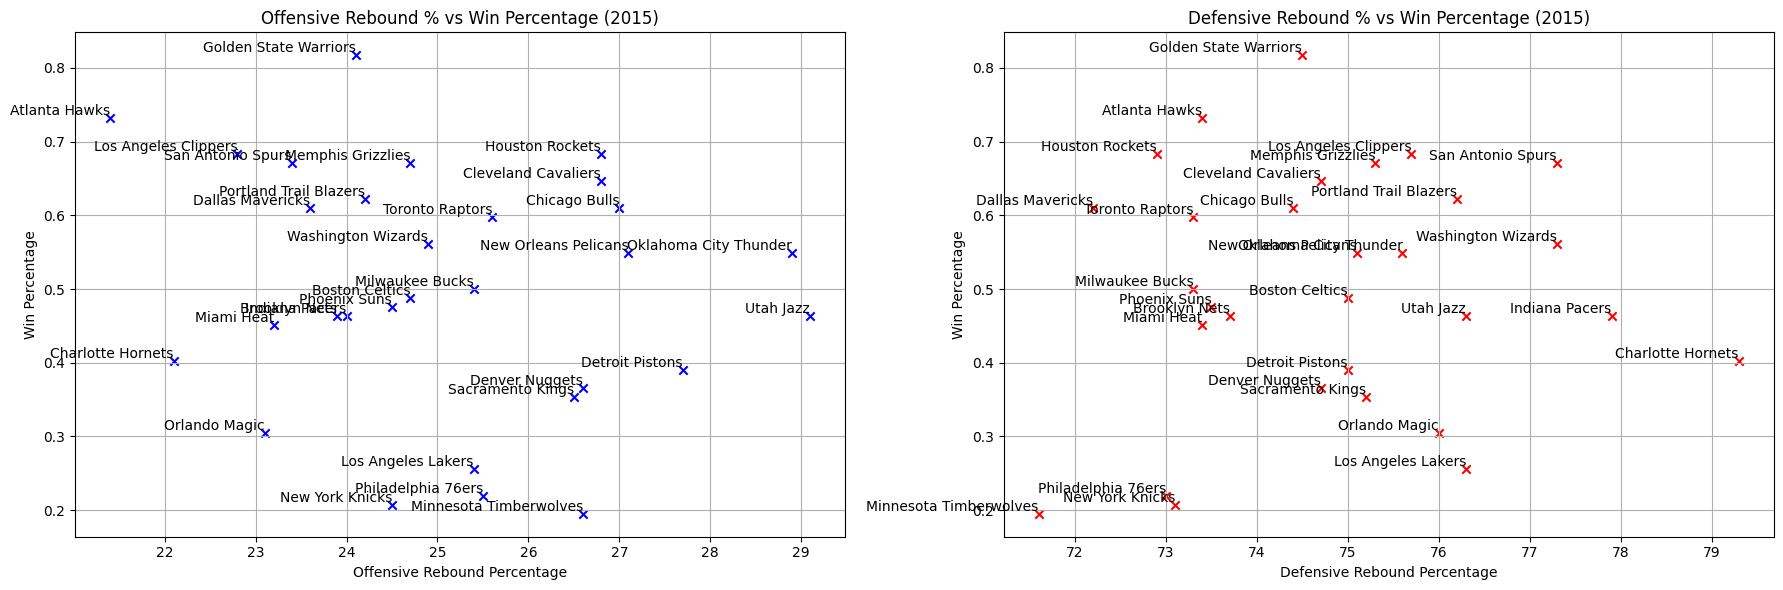

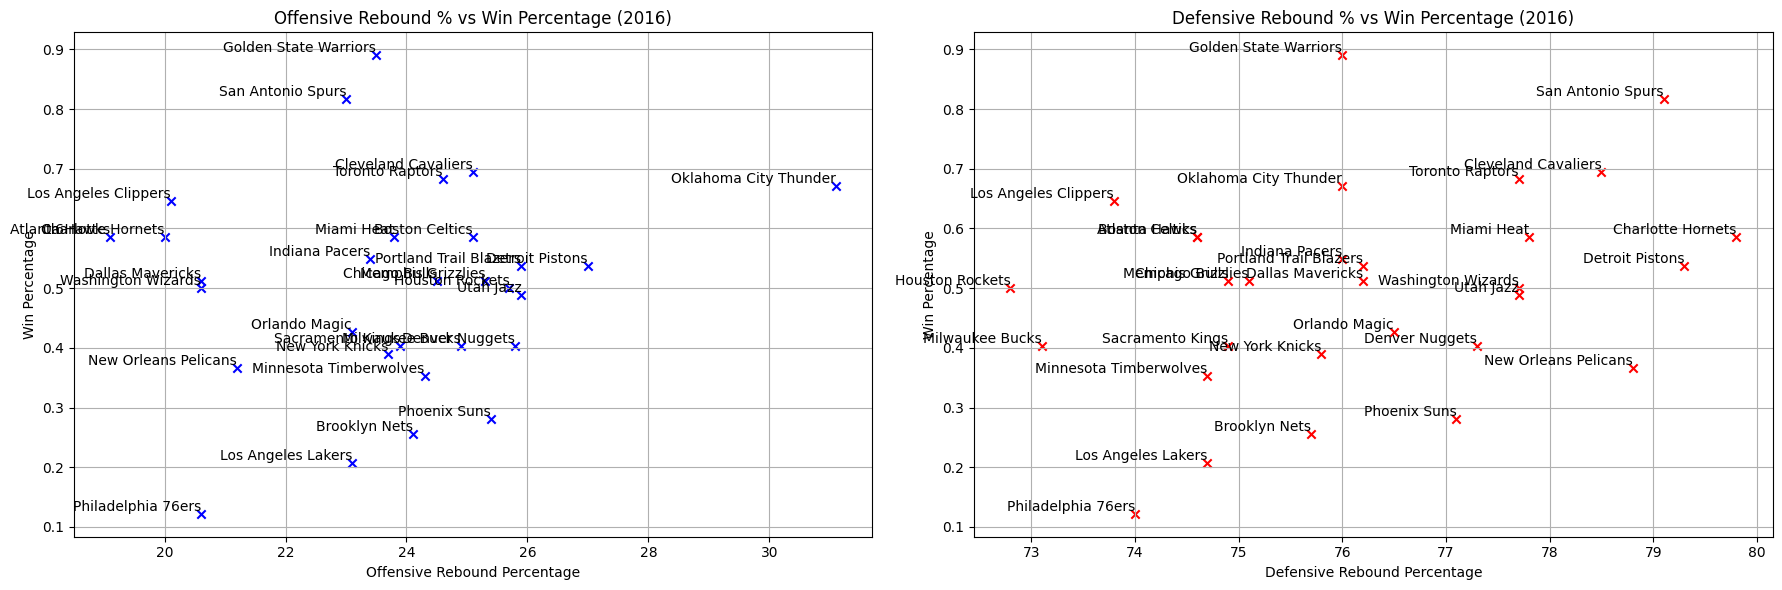

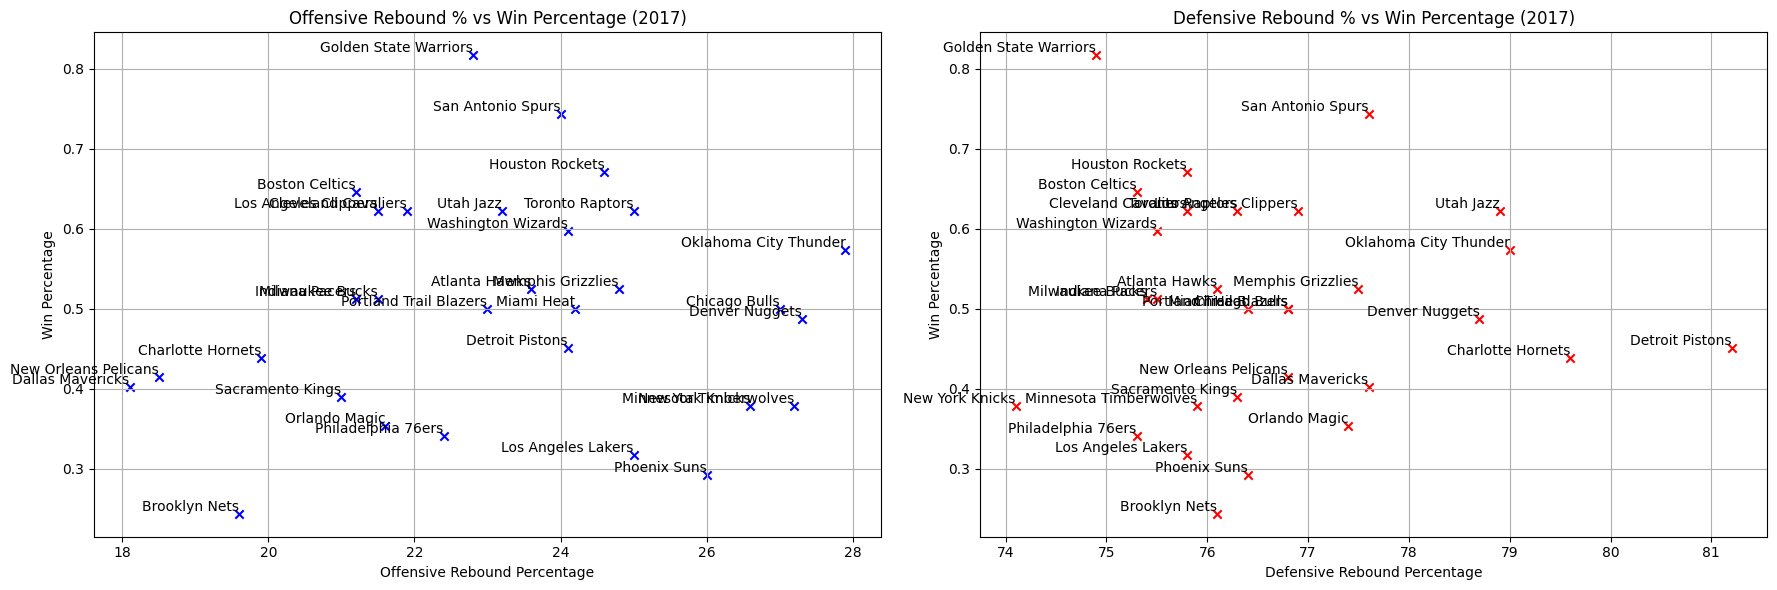

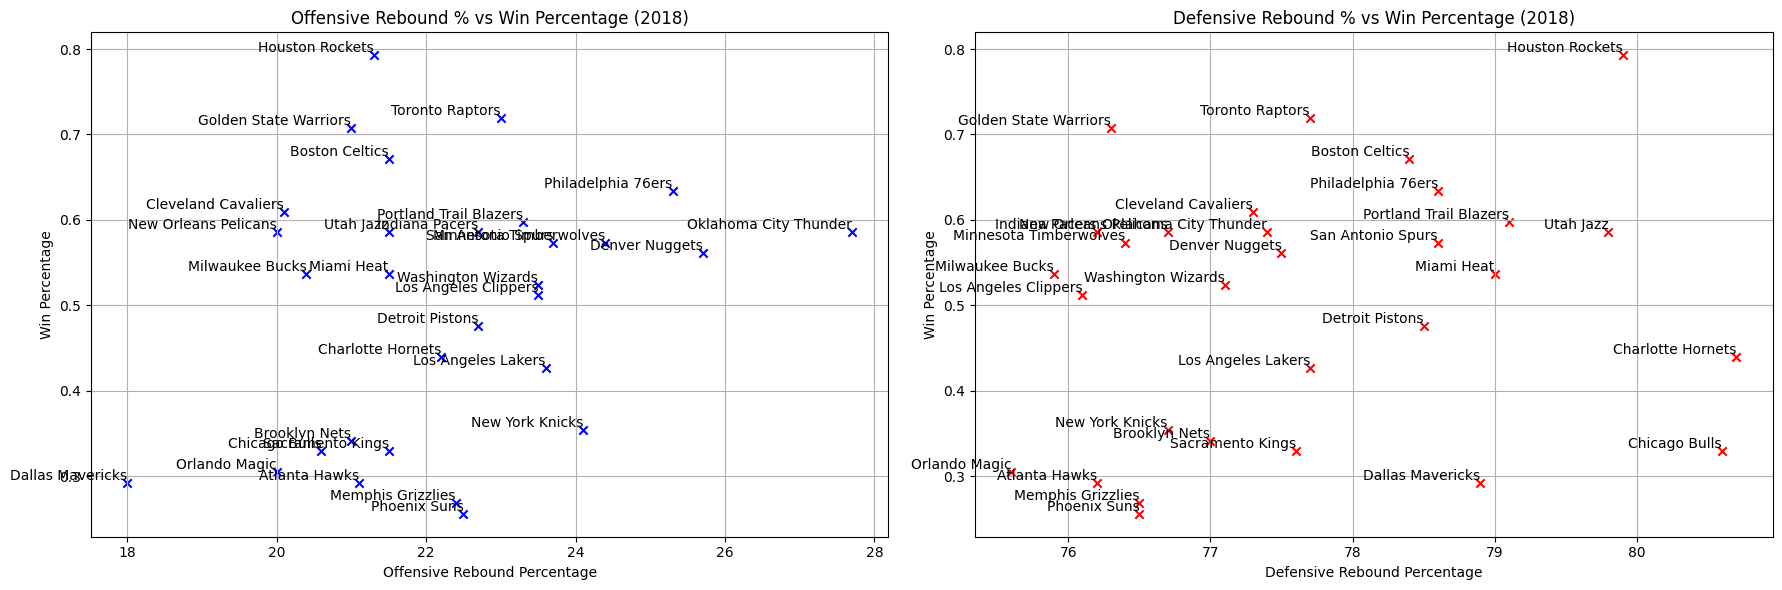

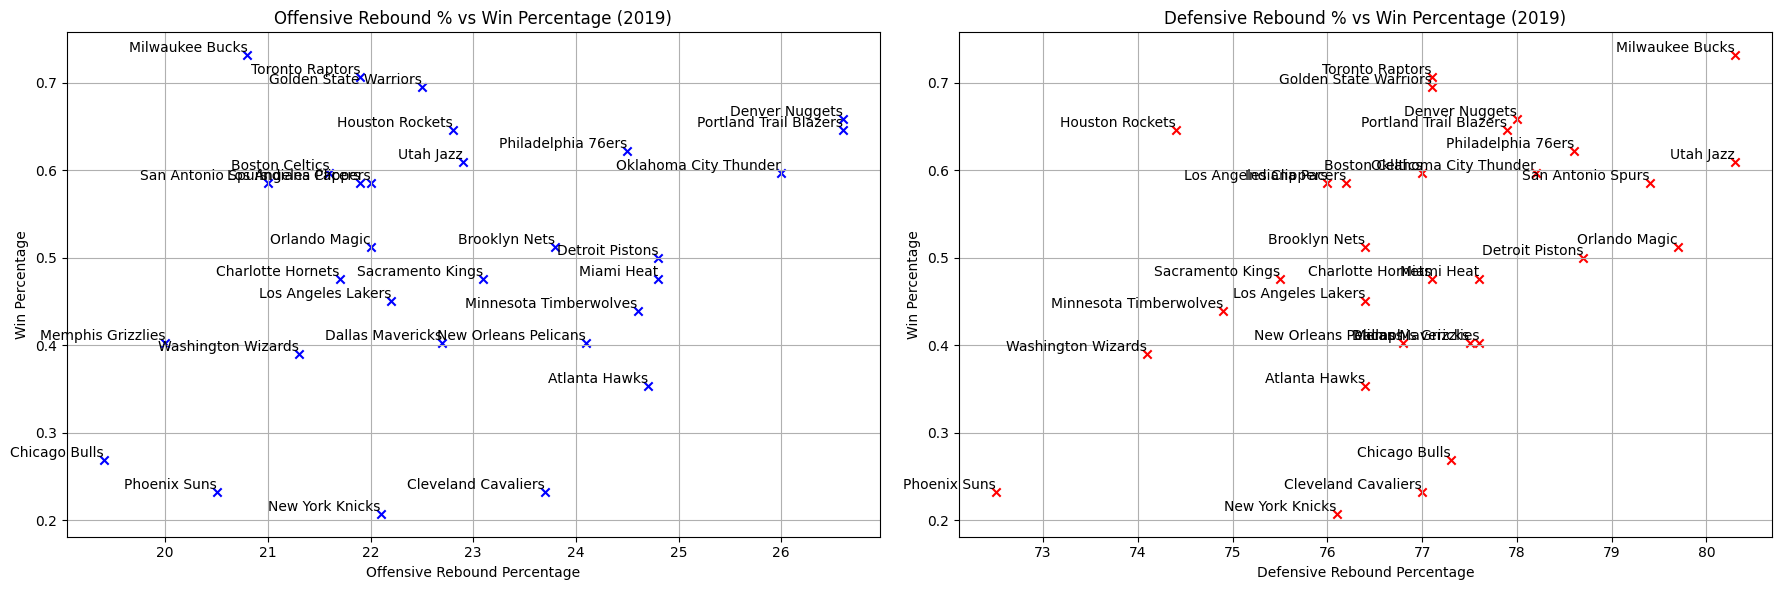

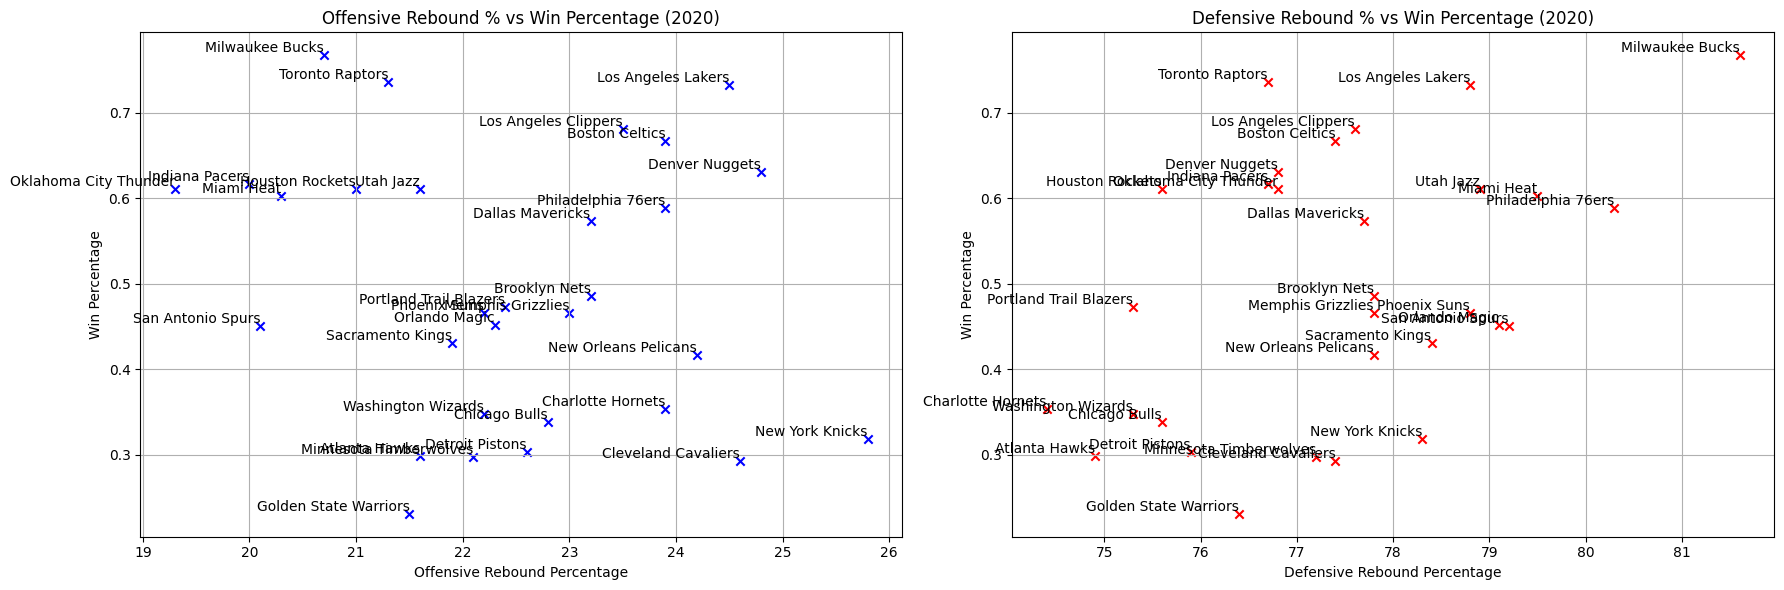

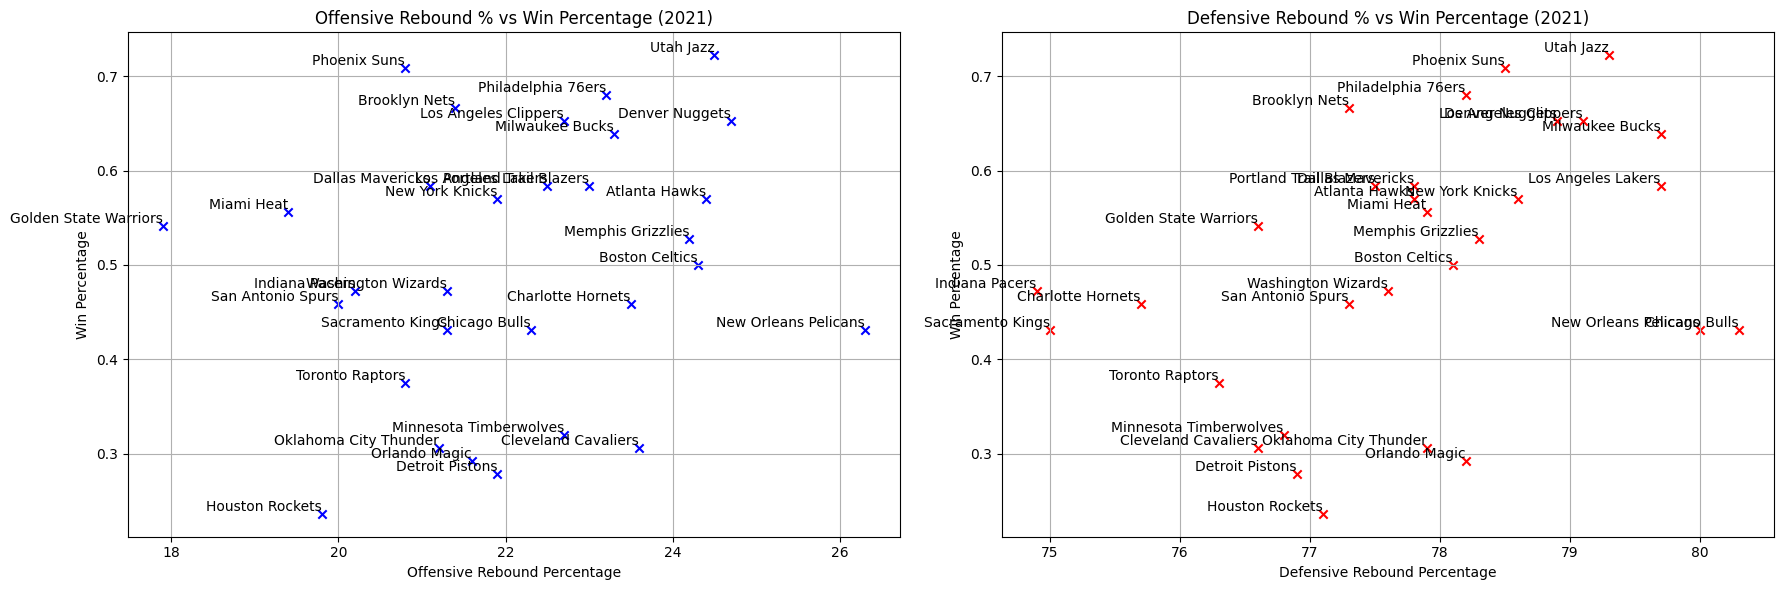

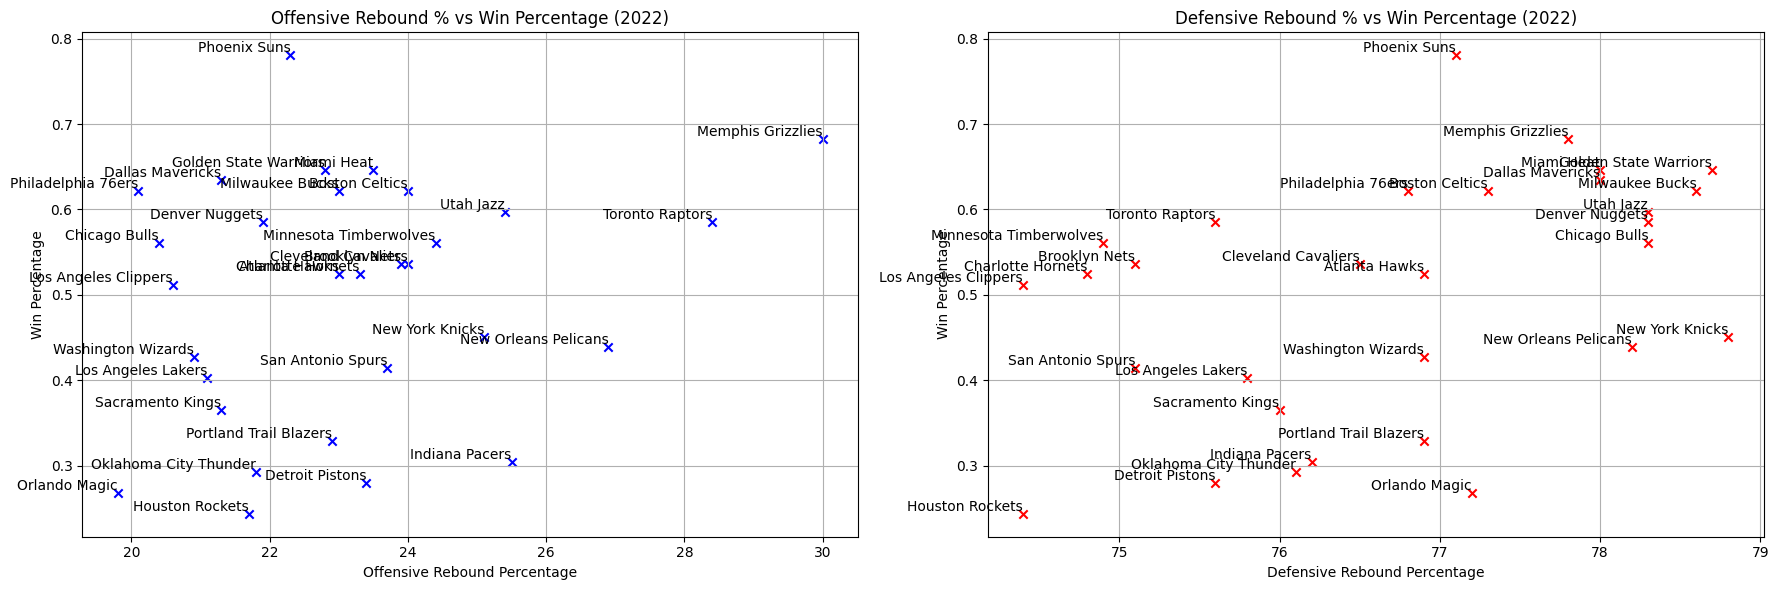

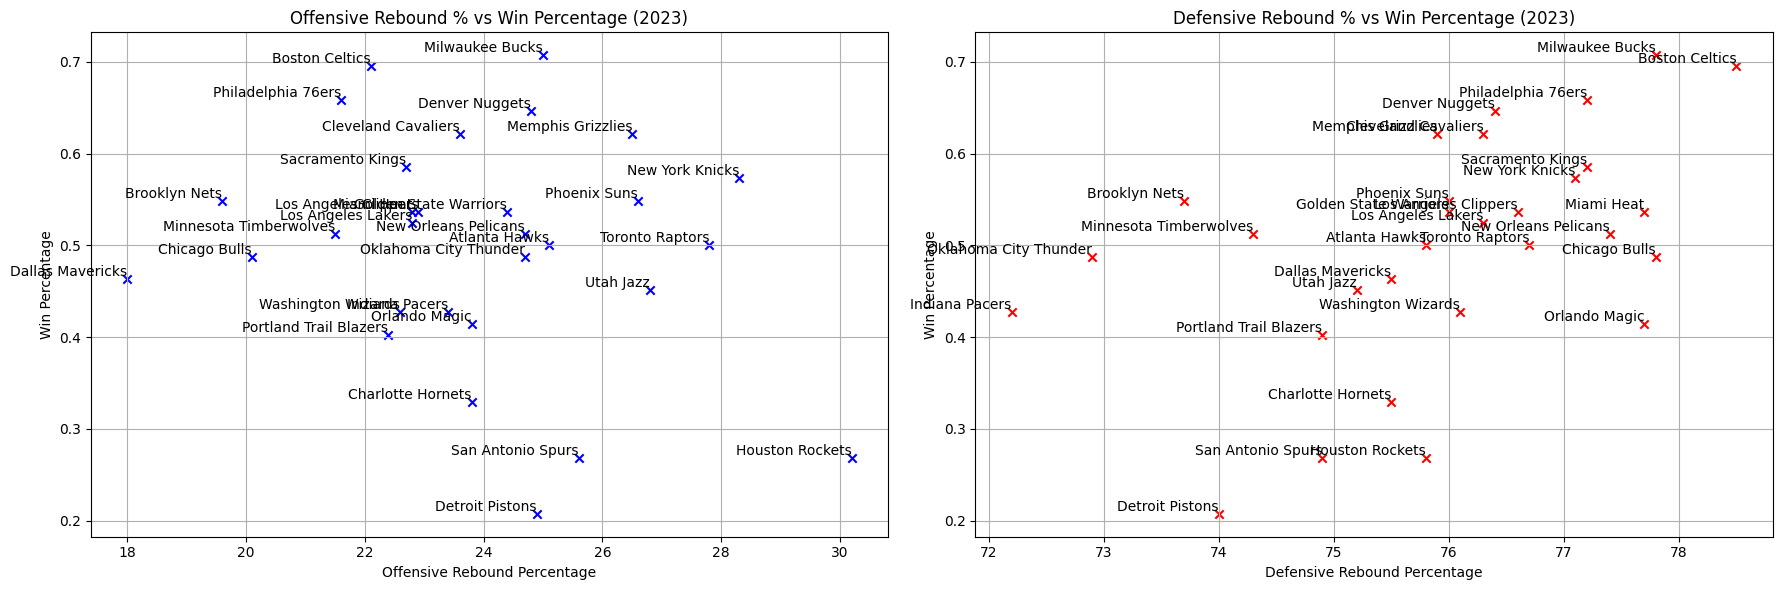

In [ ]:
for year in df1['Season'].unique():
  fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

  plot_factor_vs_win(axes[0], df1, year, 'ORB%', 'Win%', 'blue', 'Offensive Rebound Percentage', f'Offensive Rebound % vs Win Percentage ({year})')
  plot_factor_vs_win(axes[1], df1, year, 'DRB%', 'Win%', 'red', 'Defensive Rebound Percentage', f'Defensive Rebound % vs Win Percentage ({year})')

  plt.tight_layout()
  plt.show()

### Free Throws Per Field Goal Attempt vs Win Percentage (10 Year Span)

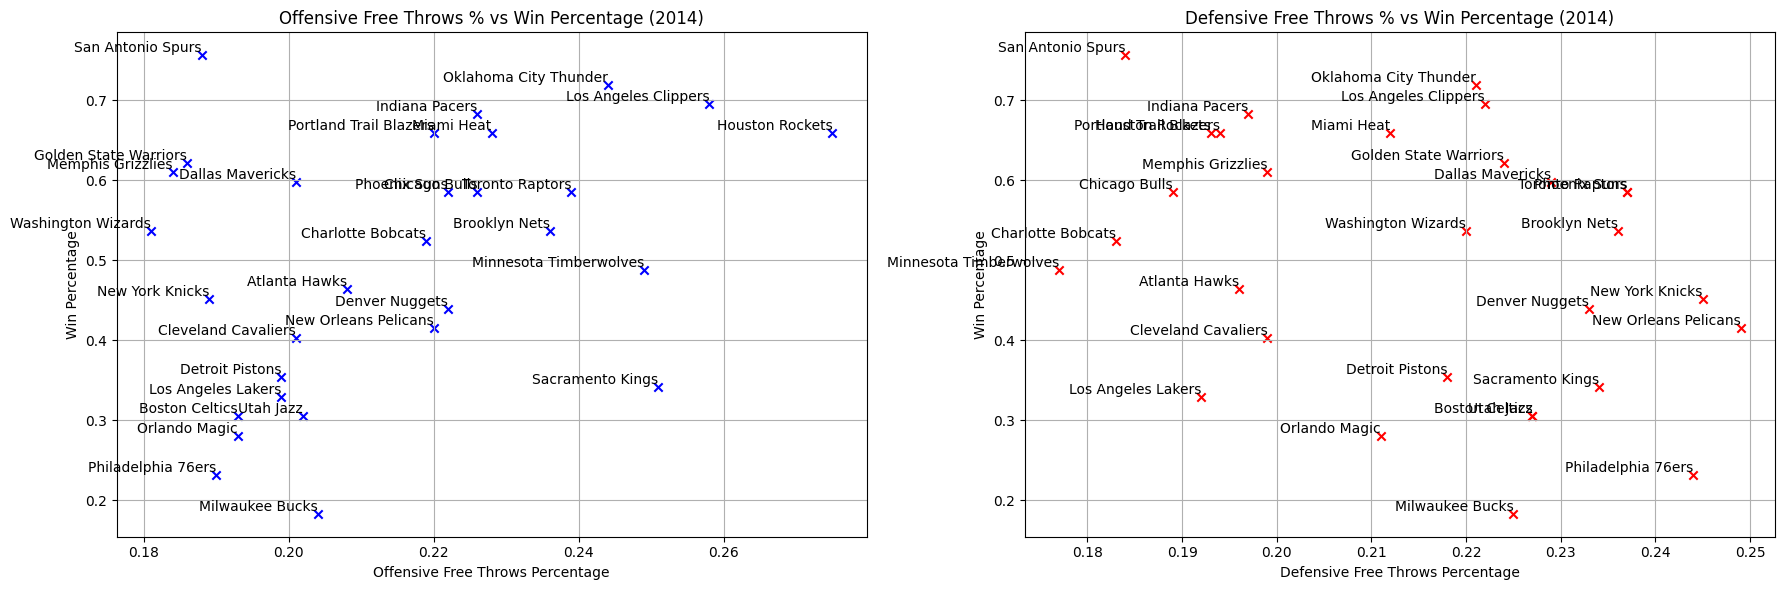

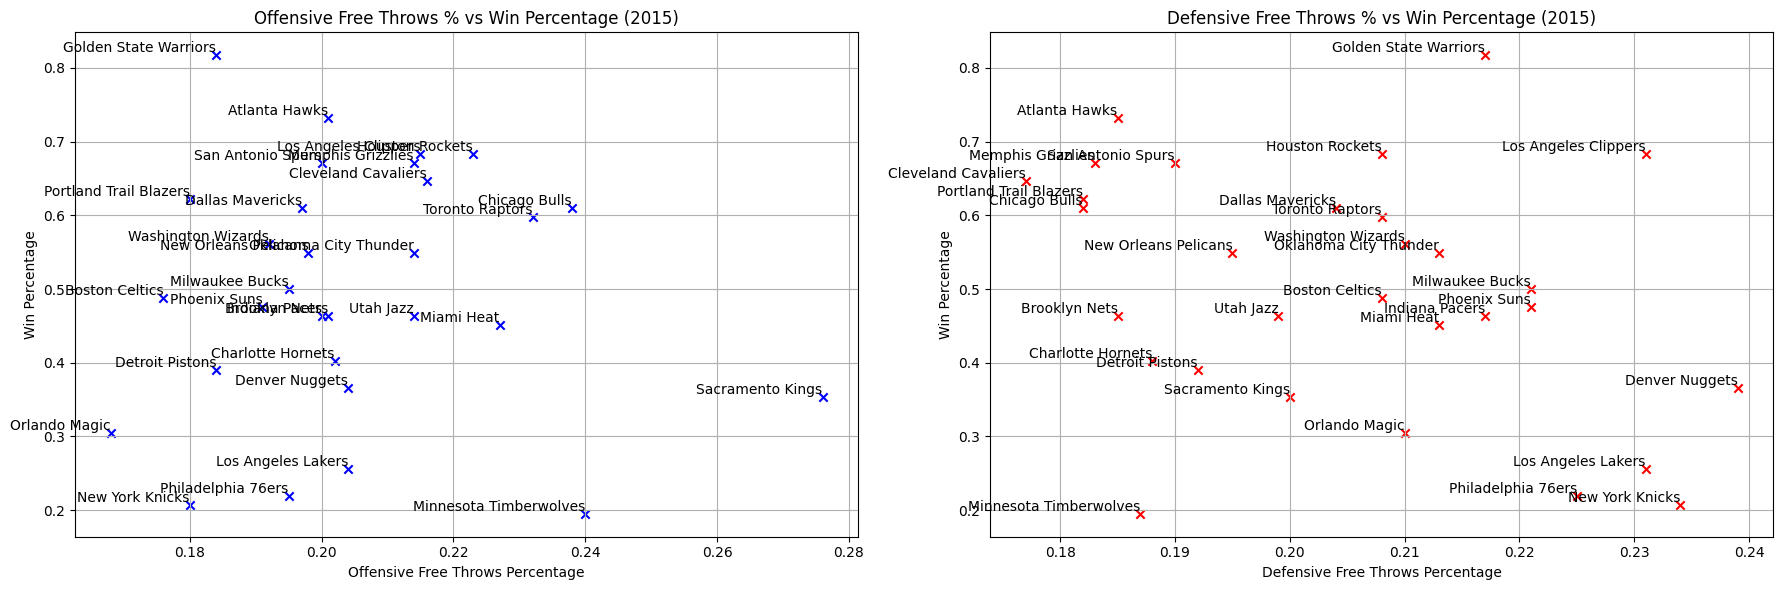

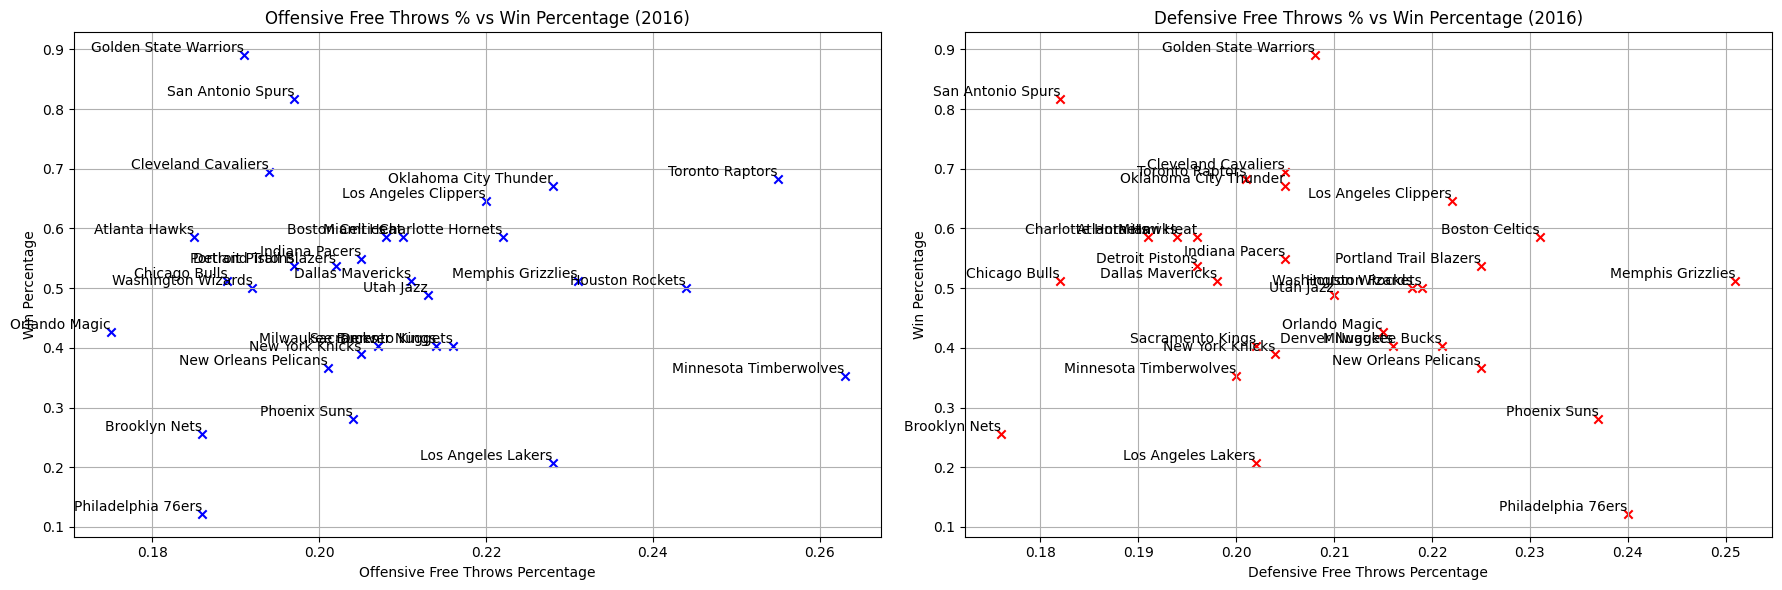

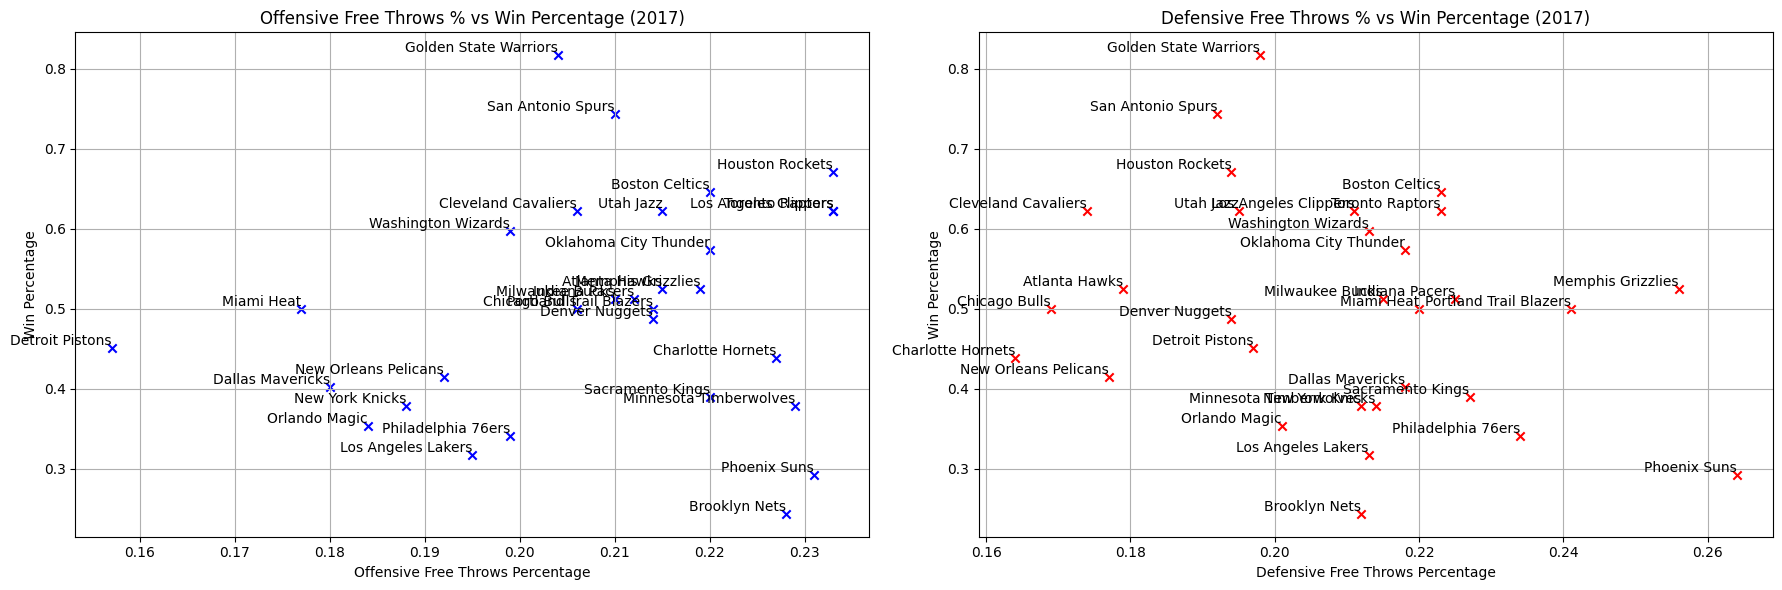

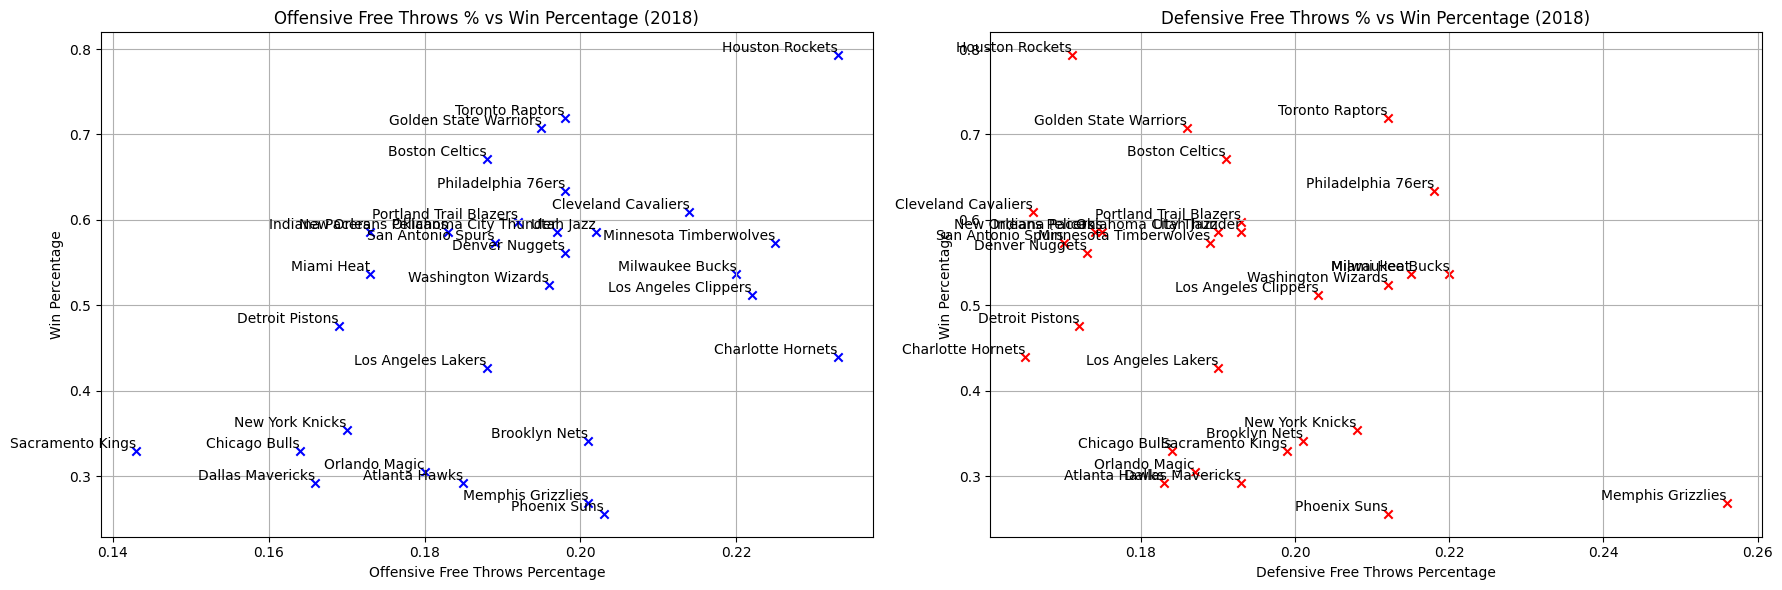

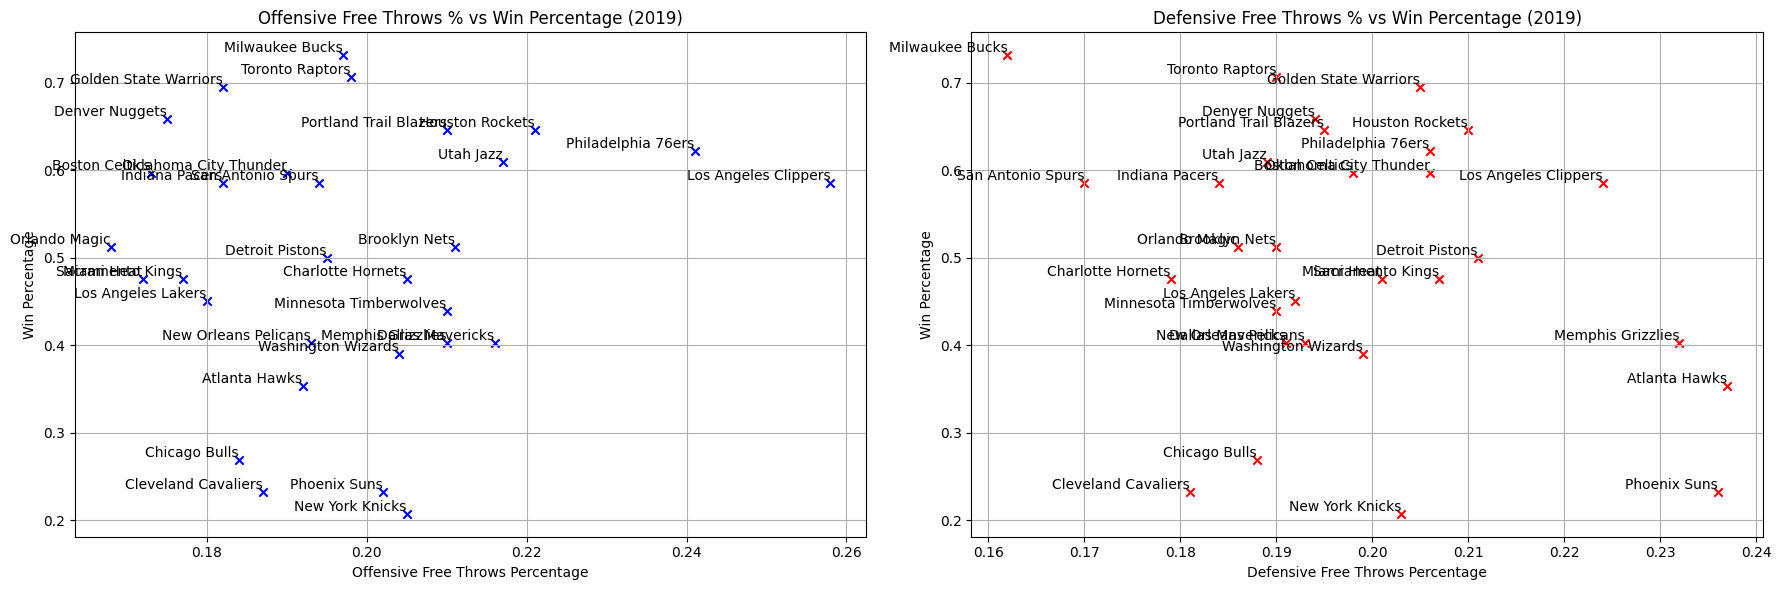

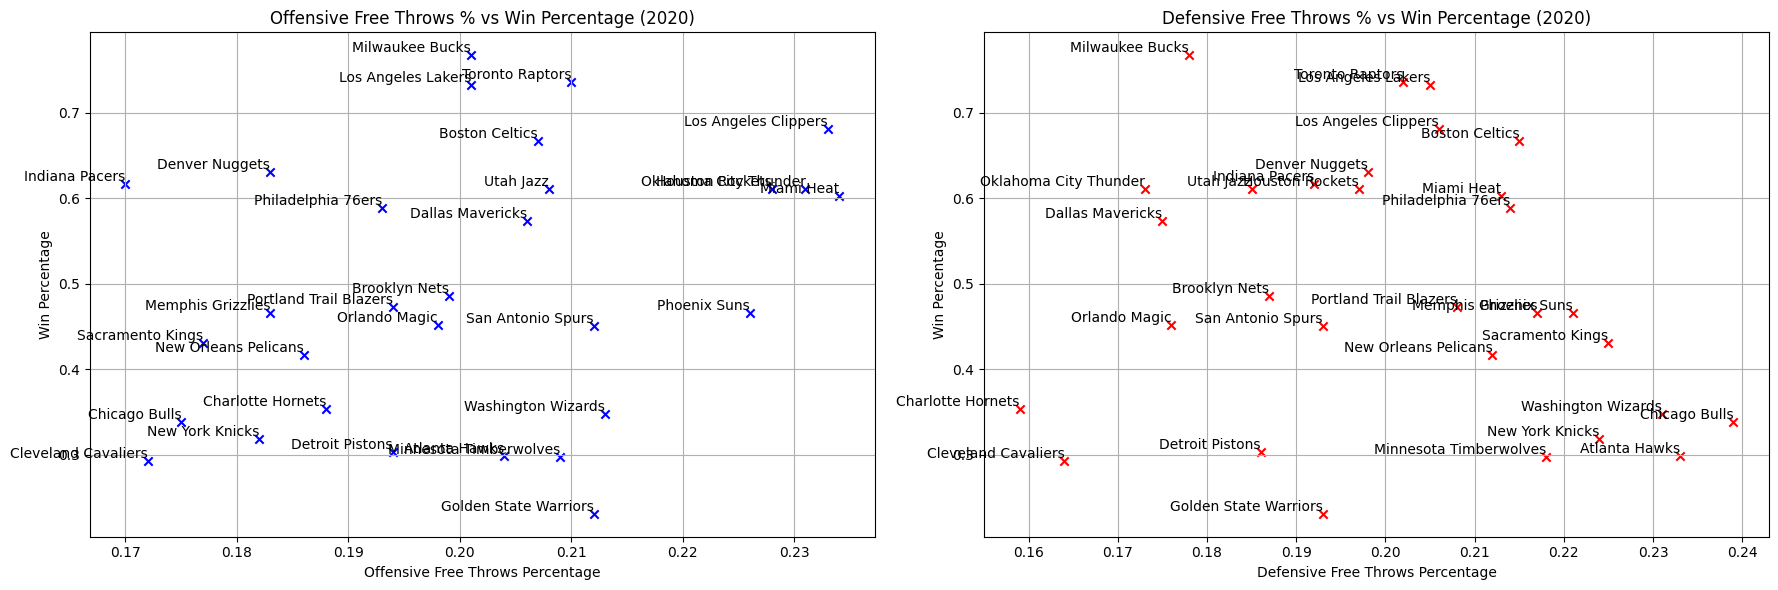

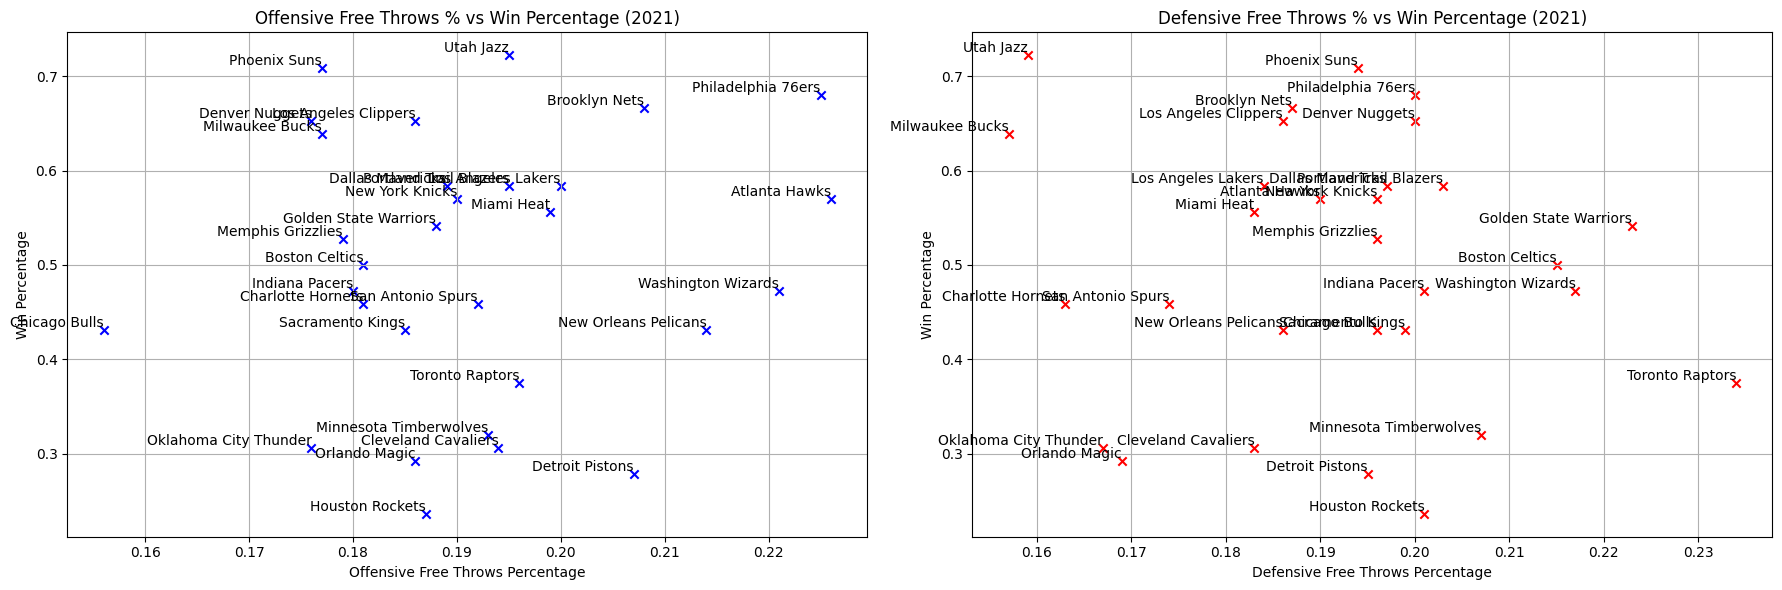

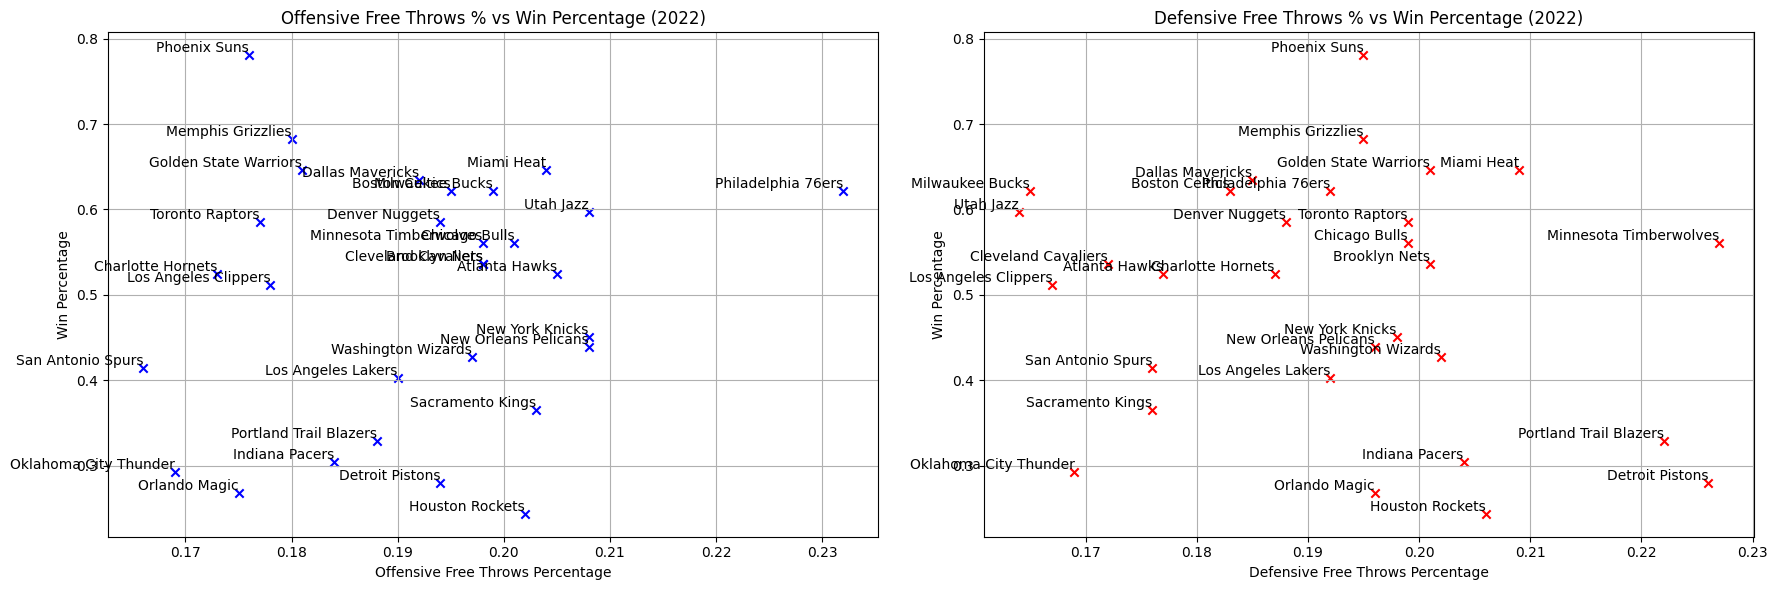

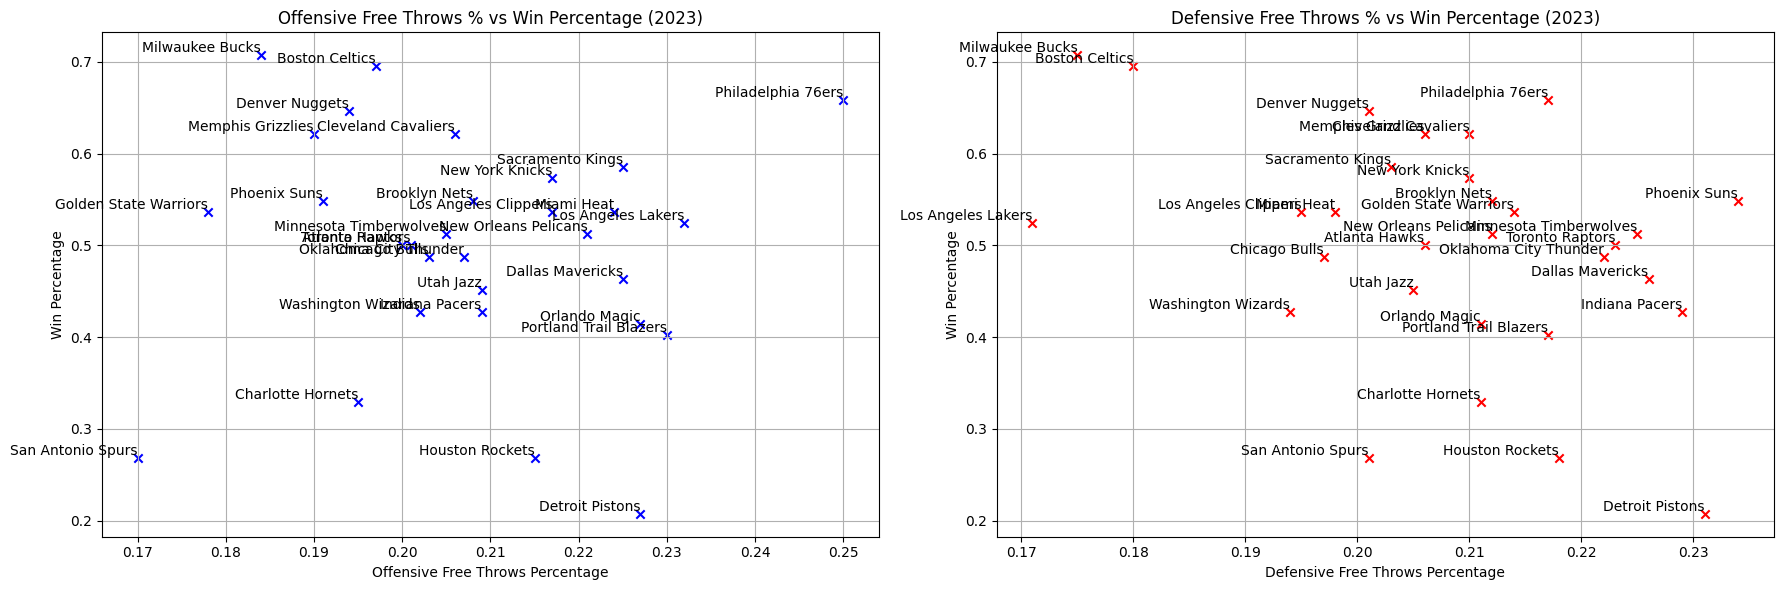

In [ ]:
for year in df1['Season'].unique():
  fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

  plot_factor_vs_win(axes[0], df1, year, 'FT/FGA', 'Win%', 'blue', 'Offensive Free Throws Percentage', f'Offensive Free Throws % vs Win Percentage ({year})')
  plot_factor_vs_win(axes[1], df1, year, 'd_FT/FGA', 'Win%', 'red', 'Defensive Free Throws Percentage', f'Defensive Free Throws % vs Win Percentage ({year})')

  plt.tight_layout()
  plt.show()

## Insights

When examining eFG% for both offense and defense over the last 10 years, we observe a positive correlation similar to that of 2023, wherein teams with high offensive eFG% and low defensive eFG% tend to have a higher proportion of wins.

However, this trend is more pronounced in some seasons than in others. For instance, in 2014, the Miami Heat had the highest offensive eFG% but a relatively high defensive eFG%, indicating they didn't defend well against opponents' scoring. This resulted in their winning percentage being the 5th best in the NBA season. It reinforces the saying that 'defense wins games.'

In contrast, from 2015 to 2017, the Golden State Warriors (GSW) consistently had the highest eFG% both offensively and defensively, which led to the highest winning percentage during those years.

Therefore, it's evident that eFG%, on both the defensive and offensive sides of the field, has a significant impact on winning games.

Turning to Turnover Percentage, we notice a similar pattern where there seems to be no strong correlation between winning percentage and defensive and offensive turnover percentages. However, a pattern observed over the years is that although turnover percentage is not as significant as eFG%, keeping it close to the league average appears to be linked to a higher win percentage. Teams with high winning percentages tend to stay close to the league average, at least on the offensive side. A vertical line representing the average per season has been added, and from the past 10 seasons, only 5 times has the team with the highest win probability exceeded the league average, mostly by a marginal margin. It makes sense that having a high number of turnovers per game leads to fewer chances to score and increases the opponent's scoring opportunities.

On the defensive side, the impact seems to be less clear than on the offensive side. Teams with the highest winning probability have had the lowest defensive TOV%, as seen with the Bucks in 2023, for example. Therefore, it appears to have a less significant impact.

When evaluating Rebound Percentage over the last 10 NBA seasons, we notice a similar pattern with offensive rebound percentage. A higher ORB% doesn't necessarily equate to a higher winning probability, as we discussed when analyzing the 2023 season. However, for DRB%, we observe some variations compared to what we discovered when reviewing 2023. Overall, teams with a higher DRB% tend to increase their winning percentage. However, between 2015-2017, the Golden State Warriors (GSW) had the highest winning percentage but also a low DRB%. The reason behind this difference can be attributed to the team's efficiency in Field Goal Percentage, particularly from the three-point line. GSW excelled in three-point shooting in each of those seasons and played at a high pace, which increased their possessions per game. They scored efficiently at the basket, explaining their remarkable 2016 season record of 73 wins and 9 losses.

As for FT/FGA, over the 10 seasons, we mostly observe that teams with a high winning percentage tend to have low defensive FT/FGA, indicating fewer fouls on their opponents and restricting them from taking uncontested shots. On offense, it appears that teams with a high winning percentage have shown both high and low FT/FGA, suggesting that this factor may not play as significant a role as its defensive counterpart.

# Statiscal analysis

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

summary_data = {
    'Factor': [],
    'R-squared': [],
    'Coefficient': [],
}

for factor in ['eFG%','TOV%','ORB%','FT/FGA','d_eFG%','d_TOV%','DRB%','d_FT/FGA']:
    X = df1[[factor]]
    y = df1['Win%']

    model = LinearRegression().fit(X, y)

    y_pred = model.predict(X)

    r2 = r2_score(y, y_pred)

    coef = model.coef_[0]

    summary_data['Factor'].append(factor)
    summary_data['R-squared'].append(r2)
    summary_data['Coefficient'].append(coef)

summary_df_sklearn = pd.DataFrame(summary_data).sort_values(by='R-squared', ascending=False)
summary_df_sklearn

Factor  R-squared  Coefficient
0      eFG%   0.304981     3.411365
4    d_eFG%   0.227370    -3.257831
6      DRB%   0.060735     0.018863
1      TOV%   0.058609    -0.036234
7  d_FT/FGA   0.055015    -1.689496
3    FT/FGA   0.022626     1.057134
2      ORB%   0.001707     0.002478
5    d_TOV%   0.001684     0.005484

Now that we have examined the relationship between winning percentage and the four factors, let's use statistical analysis to determine if our assumption that eFG% and DRB% are the most significant factors for winning is correct.

We will utilize R-squared, which functions as a scorecard for assessing the performance of a statistical model, specifically in this case, Regression analysis. R-squared will inform us about the goodness of fit of our model. An R-squared value of 1 signifies a perfect fit, while 0 suggests that the model does not explain any of the data's variability.

Additionally, we will consider the Coefficient, which quantifies the strength and direction of the impact of one factor on another in a statistical equation.

Upon analyzing the results, we observe that both offensive and defensive eFG% and DRB% have R-squared values close to 1, although they are not precisely 1, indicating that they are not a perfect fit. Nevertheless, this aligns with our previous discussion, confirming that these factors are indeed the most significant in determining win success.

In terms of Coefficient, both offensive and defensive eFG% demonstrate a substantial effect on winning when compared to the other factors. However, it appears that FT/FGA has a more significant impact on winning than DRB%. This makes sense because if a team collects more uncontested free throws and converts them, it would increase their chances of winning. Conversely, if a team concedes a lot of uncontested free throws (providing the opposing team with more opportunities to score), it would increase their chances of losing. Regarding DRB%, we have observed that teams with both low and high DRB% can still maintain relatively high winning percentages, implying that their coefficient has a weaker impact.

Now that we have assessed each factor individually, let's explore how these factors collectively impact the win rate.


## Multiple Linear Regression

In [ ]:
X_all = df1[['eFG%','TOV%','ORB%','FT/FGA','d_eFG%','d_TOV%','DRB%','d_FT/FGA']]
X_efg = df1[['eFG%','d_eFG%']]
X_tov = df1[['TOV%','d_TOV%']]
X_rb = df1[['ORB%','DRB%']]
X_ft = df1[['FT/FGA','d_FT/FGA']]

X_list = [X_all, X_efg, X_tov, X_rb, X_ft]

In [ ]:
X = df1[['eFG%','TOV%','ORB%','FT/FGA','d_eFG%','d_TOV%','DRB%','d_FT/FGA']]

r2_results = []

for x in X_list:
  X = x
  y = df1['Win%']

  reg = LinearRegression().fit(X, y)

  r2 = reg.score(X, y)

  r2_results.append(r2)

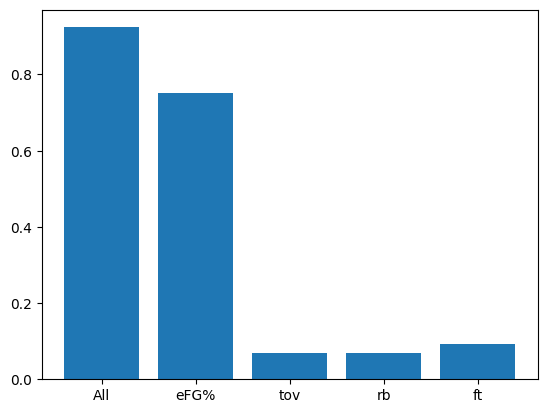

In [ ]:
fig, ax = plt.subplots()
ax.bar(['All', 'eFG%', 'tov', 'rb', 'ft'], r2_results)

plt.show()

From the results we can clearly see eFG% is the most signifcant factor which affects win rate. Without it the difference is huge and with all the other factors the comparsion to eFG% alone is marginal.

eFG% has the highest weighting in the four factors with 40% but I am unsure if that is a correct representation. it is possible that the weighting should be higher however further analysis must be done to decide if this is the case.


# Conclusion

In conclusion, while eFG% stands out as a strong indicator, considering all four factors together brings us closer to achieving a near-perfect fit in comparison to solely relying on eFG% or the combination of eFG% with rebound percentage, which I believe to be the most impactful. This underscores the notion that the four factors offer a comprehensive roadmap to understanding how teams secure victories. While further statistical analysis can be undertaken to fine-tune the weighting or explore additional factors like a team's pace of play, one thing remains certain: teams that excel in shooting efficiency, minimize their opponents' second chances, reduce their own turnovers, and effectively draw fouls to the basket have a winning formula, and the four factors serve as a testament to this winning strategy.